In [1]:
from lma.jupyter.setupJupyter import setupJupyter; setupJupyter()  #plotStyle='paper') #plotTheme='light', 

In [7]:
plt.rcParams['figure.dpi'] = 200

In [68]:
a = np.zeros(5)
a[...] = range(5)

In [69]:
a

array([0., 1., 2., 3., 4.])

In [92]:
from cytoolz import merge_sorted
import numpy as np
from numpy.testing import assert_array_equal

grp_1 = [
    np.array([10, 20, 30, 40]),
    np.array(["A", "C", "E", "G"]),
]

grp_2 = [
    np.array([15, 25, 35]),
    np.array(["Z", "Y", "X"]),
]

def combine_groups(*groups):
    combined_arrays = [np.concatenate([grp[idx] for grp in groups]) for idx in range(len(groups[0]))]
    sort_indices = np.argsort(combined_arrays[0], kind="mergesort")
    # Merge sort rather than quicksort because the former is stable
    return [arr[sort_indices] for arr in combined_arrays]

def combine_groups_ms(*groups):
#     l = sum(g[0].size for g in groups)
#     comb = [np.empty(l) for i in range(len(groups[0]))]
    it = merge_sorted(*(zip(*g) for g in groups))
    
    
#     return list(it)
    return [np.array(d) for d in zip(*it)]

def combine_groups_ssi(g0, g1):
    ix = g0[0].searchsorted(g1[0])
#     return [np.concatenate([g0[i], g1[i]])[ix] for i in range(len(g0))]
    
    return [np.insert(g0[i], ix, g1[i]) for i in range(len(g0))]

def combine_as_struct(*groups):
    rows = sum(g[0].size for g in groups)
    cols = len(groups[0])
    dtype = [(('f%d' % i), groups[0][i].dtype) for i in range(cols)]
    
    comb = np.empty(rows, dtype=dtype)
    names = comb.dtype.names
    end = 0
    for g in groups:
        start = end
        end += g[0].size
        rows = comb[start:end]
        for i,field in enumerate(g):
            rows[names[i]] = field
    
    comb.sort(kind='mergesort')

    return comb

expected = combine_groups(grp_1, grp_2)
assert_array_equal(combine_groups_ms(grp_1, grp_2), expected)
assert_array_equal(combine_groups_ssi(grp_1, grp_2), expected)

In [50]:
n = int(1e6)

grp_3 = [
    np.arange(0, n*2, 2),
    np.arange(n),
]

grp_4 = [
    np.arange(1, n*2+1, 2),
    np.arange(n, 0, -1),
]

In [50]:
grp_5 = np.array(grp_1, )

In [25]:
print(combine_groups(grp_1, grp_2))

[array([10, 15, 20, 25, 30, 35, 40]), array(['A', 'Z', 'C', 'Y', 'E', 'X', 'G'], dtype='<U1')]


In [34]:
# it = merge_sorted(zip(*grp_1), zip(*grp_2))
it = merge_sorted(*(zip(*g) for g in (grp_1, grp_2)))
grp_comb = [np.array(d) for d in zip(*it)]

print(grp_comb)

[array([10, 15, 20, 25, 30, 35, 40]), array(['A', 'Z', 'C', 'Y', 'E', 'X', 'G'], dtype='<U1')]


In [23]:
ix = grp_1[0].searchsorted(grp_2[0])
grp_comb= [np.insert(grp_1[i], ix, grp_2[i]) for i in range(2)]
print(grp_comb)

[array([10, 15, 20, 25, 30, 35, 40]), array(['A', 'Z', 'C', 'Y', 'E', 'X', 'G'], dtype='<U1')]


In [89]:
print(combine_as_struct(grp_1, grp_2))

[(10, 'A') (15, 'Z') (20, 'C') (25, 'Y') (30, 'E') (35, 'X') (40, 'G')]


#### small group timings

In [39]:
%%timeit
combine_groups(grp_1, grp_2)

6.84 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
%%timeit
combine_groups_ms(grp_1, grp_2)

10.4 µs ± 249 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
%%timeit
combine_groups_ssi(grp_1, grp_2)

36.3 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [90]:
%%timeit
combine_as_struct(grp_1, grp_2)

9.4 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### large groups timings

In [55]:
%%timeit
combine_groups(grp_3, grp_4)

67.8 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
%%timeit
combine_groups_ms(grp_3, grp_4)

1.09 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%%timeit
combine_groups_ssi(grp_3, grp_4)

175 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
%%timeit
combine_as_struct(grp_3, grp_4)

602 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
%%timeit
np.array(list(merge_sorted(grp_1[0], grp_2[0])))

4 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [61]:
%%timeit
np.array(combine_groups([grp_1[0]], [grp_2[0]]))

7.06 µs ± 164 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [62]:
np.array(combine_groups([grp_1[0]], [grp_2[0]]))

array([[10, 15, 20, 25, 30, 35, 40]])

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy 
from random import randint

def discrete_gauss(n):
    g = np.array([1, 1], dtype='O')
    f = g
    for _ in range(1, n-1):
        f = np.convolve(f,g)
    
    # normalize to a probability distribution
    f = f.astype(np.float128)/np.float128(f.sum())
    
#     if not np.allclose(f.sum(), 1.0):
    if f.sum() != np.float(1.0):
        raise ValueError("The distribution sum is not 1.\n" 
                         "f.sum(): %.500f" % f.sum())
    else:
        return f

In [32]:
print('%.50f' % discrete_gauss(70).sum())
print(discrete_gauss_comb(70).tolist()) 

ValueError: The distribution sum is not 1.
f.sum(): 1.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [235]:
import numpy as np
import scipy.special as sps

def discrete_gauss(n):
    f = np.array([sps.comb(n - 1, i, exact=True) for i in range(n)], dtype='O')
    f = f/f.sum()
#     f = np.float128(f)/np.float128(f).sum()
#     f = np.float64(f)

#     if not np.allclose(f.sum(), 1.0):
    if f.sum() != 1.0:
        raise ValueError("The distribution sum is not 1.\n" 
                         "f.sum(): %s" % f.sum())

    return f

In [236]:
n = 0
for i in range(1,1001):
    try:
        discrete_gauss(i)
    except ValueError:
        n += 1
        print(i, end=', ')
        
print(n)

59, 61, 62, 64, 67, 68, 70, 71, 74, 76, 77, 78, 80, 84, 85, 86, 88, 89, 90, 91, 92, 95, 96, 97, 99, 101, 102, 103, 106, 107, 108, 109, 110, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 127, 128, 129, 132, 133, 136, 137, 138, 140, 141, 142, 144, 146, 147, 148, 149, 150, 152, 153, 155, 158, 159, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 175, 176, 177, 178, 179, 181, 182, 186, 188, 189, 190, 191, 193, 194, 195, 197, 198, 199, 200, 203, 205, 208, 209, 211, 212, 214, 215, 217, 218, 219, 220, 222, 225, 226, 227, 229, 230, 231, 233, 234, 235, 236, 237, 241, 247, 248, 249, 252, 253, 256, 257, 258, 259, 261, 262, 263, 264, 266, 269, 270, 271, 273, 274, 276, 277, 279, 280, 282, 283, 284, 288, 289, 291, 292, 293, 295, 297, 298, 300, 302, 304, 305, 306, 307, 308, 310, 312, 313, 314, 315, 316, 317, 318, 319, 322, 323, 324, 325, 326, 327, 329, 331, 333, 334, 335, 336, 339, 340, 341, 342, 343, 344, 345, 347, 348, 350, 351, 352, 354, 357, 359, 360, 361, 362, 363, 365, 367, 370, 372, 

In [94]:
import numpy as np
import scipy.special as sps

def discrete_gauss(n):
    f = np.array([sps.comb(n - 1, i, exact=True) for i in range(n)], dtype='O')
    f = np.float64(f)/np.float64(f).sum()
    
    if not np.allclose(f.sum(), 1.0):
        raise ValueError("The distribution sum is not close to 1.\n" 
                         "f.sum(): %s" % f.sum())

    return f

In [2]:
nnot1 = []
for n in range(1,1001):
    if discrete_gauss(n).sum() != 1.0:
        nnot1.append(n)

print('`discrete_gauss(n).sum()` was not equal to `1.0` for `%d` values of `n`.' % len(nnot1))
print(nnot1)

`discrete_gauss(n).sum()` was not equal to `1.0` for `75` values of `n`.
[78, 89, 110, 114, 125, 127, 180, 182, 201, 206, 235, 248, 273, 342, 346, 348, 365, 373, 383, 390, 402, 403, 421, 427, 429, 451, 454, 471, 502, 531, 540, 556, 558, 574, 579, 584, 587, 595, 600, 609, 617, 631, 633, 647, 648, 651, 657, 669, 674, 703, 705, 728, 731, 763, 765, 772, 778, 783, 798, 816, 837, 852, 858, 860, 861, 867, 874, 877, 906, 912, 941, 947, 959, 964, 972]


In [243]:
import numpy as np
import scipy.special as sps

def discrete_gauss(n):
    f = np.array([sps.comb(n - 1, i, exact=True) for i in range(n)], dtype='O')
    f = np.float128(f)/sum(f)
    
    if f.sum() != 1.0:
        raise ValueError("The distribution sum is not 1.\n" 
                         "f.sum(): %s" % f.sum())

    return f

In [244]:
n = 0
for i in range(1,1001):
    try:
        discrete_gauss(i)
    except ValueError:
        n += 1
        print(i, end=', ')
        
print(n)

58, 59, 60, 61, 62, 63, 64, 

TypeError: unsupported operand type(s) for /: 'numpy.float128' and 'int'

In [226]:
import numpy as np
import scipy.special as sps

def discrete_gauss(n):
    f = np.array([sps.comb(n - 1, i, exact=True) for i in range(n)], dtype='O')
    f = np.float128(f)/np.float128(f).sum()
    f = np.float64(f)
    
    if f.sum() != 1.0:
        raise ValueError("The distribution sum is not 1.\n" 
                         "f.sum(): %s" % f.sum())

    return f

In [227]:
n = 0
for i in range(1,1001):
    try:
        discrete_gauss(i)
    except ValueError:
        n += 1
        print(i, end=', ')
        
print(n)

68, 70, 75, 76, 77, 78, 89, 92, 110, 114, 125, 127, 128, 138, 170, 180, 182, 186, 198, 201, 203, 206, 226, 235, 246, 248, 273, 276, 280, 296, 301, 305, 307, 322, 336, 342, 346, 348, 355, 365, 373, 383, 386, 390, 396, 402, 403, 412, 415, 421, 427, 429, 451, 454, 464, 471, 502, 511, 526, 527, 531, 534, 540, 555, 556, 558, 562, 569, 574, 575, 579, 584, 587, 589, 595, 600, 604, 609, 617, 631, 633, 647, 648, 651, 657, 658, 661, 669, 670, 674, 681, 703, 705, 708, 720, 728, 731, 739, 744, 754, 763, 765, 772, 778, 783, 789, 792, 793, 798, 816, 828, 837, 842, 852, 855, 858, 860, 861, 863, 864, 867, 874, 877, 888, 892, 906, 912, 926, 941, 947, 959, 962, 964, 965, 972, 982, 1000, 137


In [226]:
import numpy as np
import scipy.special as sps

def discrete_gauss(n):
    f = np.array([sps.comb(n - 1, i, exact=True) for i in range(n)], dtype='O')
    f = np.float128(f)/np.float128(f).sum()
    f = np.float64(f)
    
    if f.sum() != 1.0:
        raise ValueError("The distribution sum is not 1.\n" 
                         "f.sum(): %s" % f.sum())

    return f

In [227]:
n = 0
for i in range(1,1001):
    try:
        discrete_gauss(i)
    except ValueError:
        n += 1
        print(i, end=', ')
        
print(n)

68, 70, 75, 76, 77, 78, 89, 92, 110, 114, 125, 127, 128, 138, 170, 180, 182, 186, 198, 201, 203, 206, 226, 235, 246, 248, 273, 276, 280, 296, 301, 305, 307, 322, 336, 342, 346, 348, 355, 365, 373, 383, 386, 390, 396, 402, 403, 412, 415, 421, 427, 429, 451, 454, 464, 471, 502, 511, 526, 527, 531, 534, 540, 555, 556, 558, 562, 569, 574, 575, 579, 584, 587, 589, 595, 600, 604, 609, 617, 631, 633, 647, 648, 651, 657, 658, 661, 669, 670, 674, 681, 703, 705, 708, 720, 728, 731, 739, 744, 754, 763, 765, 772, 778, 783, 789, 792, 793, 798, 816, 828, 837, 842, 852, 855, 858, 860, 861, 863, 864, 867, 874, 877, 888, 892, 906, 912, 926, 941, 947, 959, 962, 964, 965, 972, 982, 1000, 137


In [230]:
import numpy as np
import scipy.special as sps

def discrete_gauss(n):
    f = np.array([sps.comb(n - 1, i, exact=True) for i in range(n)], dtype='O')
    f = np.float128(f)/np.float128(f).sum()
    
    if f.sum() != 1.0:
        f = np.float64(f)
        if f.sum() != 1.0:
            f = np.float32(f)
            if f.sum() != 1.0:
                raise ValueError("The distribution sum is not 1.\n" 
                                 "f.sum(): %s" % f.sum())

    return f

In [231]:
n = 0
for i in range(1,1001):
    try:
        discrete_gauss(i)
    except ValueError:
        n += 1
        print(i, end=', ')
        
print(n)

128, 972, 2


In [93]:
from mpmath import mp, mpf
import numpy as np
import scipy.special as sps

# stands for "decimal places". Larger values 
# mean higher precision, but slower computation
mp.dps = 500

def discrete_gauss_mp(n):
    f = [sps.comb(n - 1, i, exact=True) for i in range(n)]
    f = np.array([mpf(n) for n in f], dtype='O')
    f /= f.sum()
    f = np.float64(f)
    
#     if f.sum() != 1.0:
#         raise ValueError("The distribution sum is not equal to 1.0.\n" 
#                          "f.sum(): %s" % f.sum())

    return f

In [96]:
(discrete_gauss_mp(999) == discrete_gauss(999)).all()

True

In [14]:
%debug

> /usr/local/lib/python3.6/site-packages/numpy/core/numeric.py(2363)isclose()
   2361     y = array(y, dtype=dt, copy=False, subok=True)
   2362 
-> 2363     xfin = isfinite(x)
   2364     yfin = isfinite(y)
   2365     if all(xfin) and all(yfin):



ipdb>  fsum


*** NameError: name 'fsum' is not defined


ipdb>  u


> /usr/local/lib/python3.6/site-packages/numpy/core/numeric.py(2270)allclose()
   2268 
   2269     """
-> 2270     res = all(isclose(a, b, rtol=rtol, atol=atol, equal_nan=equal_nan))
   2271     return bool(res)
   2272 



ipdb>  u


> <ipython-input-12-9f96615fa0b7>(14)discrete_gauss()
     12     f = np.array([mpf(n)/fsum for n in f])
     13 
---> 14     if not np.allclose(f.sum(), 1.0):
     15         raise ValueError("The distribution sum is not close to 1.\n" 
     16                          "f.sum(): %s" % f.sum())



ipdb>  fsum


147573952589676412928


ipdb>  dtype(fsum)


*** NameError: name 'dtype' is not defined


ipdb>  p type(fsum)


<class 'int'>


ipdb>  f.sum()


mpf('1.0')


ipdb>  f.sum() == 1.0


True


ipdb>  exit


as `discrete_gauss(1000)` works, but `discrete_gauss(999)` does not. Similarly, `discrete_gauss(68)` works, but `discrete_gauss(67)` does not. The reason for this is that the exact value of *eg* `discrete_gauss(67)` contains at least one rational number (*ie* the ratio of two integers) that cannot be expressed as a `np.float64` at the needed level of precision. These kinds of precision errors are unavoidable when dealing with floating point representations of very large or very small rational numbers.

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


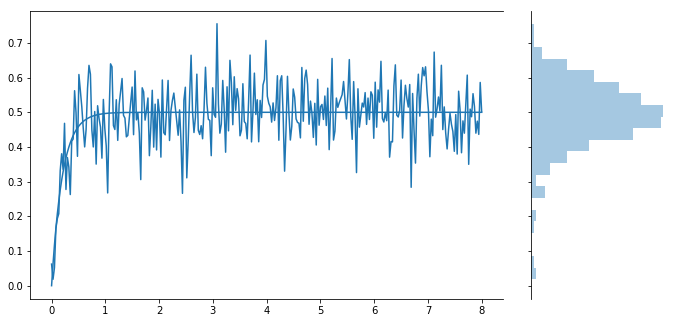

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.linspace(0,8, 300)
y = (1 - np.exp(-x*5))*.5
ynoise= y + np.random.randn(len(x))*0.08

grid = sns.JointGrid(x, ynoise, ratio=3)
grid.plot_joint(plt.plot)
grid.ax_joint.plot(x, y, c='C0')

plt.sca(grid.ax_marg_y)
sns.distplot(grid.y, kde=False, vertical=True)

# override a bunch of the default JointGrid style options
grid.fig.set_size_inches(10,6)
grid.ax_marg_x.remove()
grid.ax_joint.spines['top'].set_visible(True)

In [6]:
from mpmath import mp,mpf,workdps
import numpy as np; np.random.seed(42)
small = np.random.rand(1000)*1e-6

mp.dps = 5

a,b,c = mpf(1),mpf(7),mpf()
with workdps(5):
    print(a/b)
    c = a/b
    print(c)
    c = mp.fsum(small)
    print(c)
print(c)
c = mpf(1)/mpf(7)
c

0.14286
0.14286
0.00049026
0.00049026


mpf('0.14285707')

In [7]:
np.sum(small)

0.0004902565533201336

In [4]:
mp.prec

53

In [2]:
from sympy import Symbol
a = Symbol("a")
b = Symbol("b")
c = Symbol("c")
exp = (a+b)*40-(c-a)/0.5
exp.subs({'a':19.8,'b':212,'c':12})

9287.60000000000

In [6]:
Symbol('a') in exp.free_symbols

True

In [7]:
[x for y in range(5) for x in range(y)]

[0, 0, 1, 0, 1, 2, 0, 1, 2, 3]

In [1]:
from sympy import S, solveset, Symbol
from sympy.parsing.sympy_parser import parse_expr

class MyCalculator:
    # sympy assumes all expressions are set equal to zero
    exprStr = (
        'a*b - c',
        'b + d - e',
        'c/e - f'
    )
    # parse the expression strings into actual expressions
    expr = tuple(parse_expr(es) for es in exprStr)
    
    # create a dictionary to lookup expressions based on the symbols they depend on
    exprDep = {}
    for e in expr:
        for s in e.free_symbols:
            exprDep.setdefault(s, set()).add(e)
    
    # create a set of the used symbols for input validation
    validSymb = set(exprDep.keys())
    
    def __init__(self, usefloat=False):
        """usefloat: if set, store values as standard Python floats (instead of the Sympy numeric types)
        """
        self.vals = {}
        self.numify = float if usefloat else lambda x: x

    def set(self, symb, val, _exclude=None):
        # ensure that symb is a sympy Symbol object
        if isinstance(symb, str): symb = Symbol(symb)
        if symb not in self.validSymb:
            raise ValueError("Invalid input symbol.\n"
                             "symb: %s, validSymb: %s" % (symb, self.validSymb))
        
        # initialize the set of excluded expressions, if needed
        if _exclude is None: _exclude = set()
        
        # record the updated value of symb
        self.vals[symb] = self.numify(val)
        # loop over all of the expressions that depend on symb
        for e in self.exprDep[symb]:
            if e in _exclude:
                # we've already calculated an update for e in an earlier recursion, skip it
                continue
            # mark that e should be skipped in future recursions
            _exclude.add(e)
            
            # determine the symbol and value of the next update (if any)
            nextsymbval = self.calc(symb, e)
            if nextsymbval is not None:
                # there is another symbol to update, recursively call self.set
                self.set(*nextsymbval, _exclude)
    
    def calc(self, symb, e):
        # find knowns and unknowns of the expression
        known = [s for s in e.free_symbols if s in self.vals]
        unknown = [s for s in e.free_symbols if s not in known]
        
        if len(unknown) > 1:
            # too many unknowns, can't do anything with this expression right now
            return None
        elif len(unknown) == 1:
            # solve for the single unknown
            nextsymb = unknown[0]
        else:
            # solve for the first known that isn't the symbol that was just changed
            nextsymb = known[0] if known[0] != symb else known[1]
            
        # do the actual solving
        sol = solveset(e, nextsymb, domain=S.Reals)
        
        # evaluate the solution given the known values, then return a tuple of (next-symbol, result)
        return nextsymb, sol.subs(self.vals).args[0]

    def __str__(self):
        return ' '.join(sorted('{} = {}'.format(k,v) for k,v in self.vals.items()))

In [2]:
mycalc = MyCalculator()
mycalc.set("a", 5)
mycalc.set("e", 7)
mycalc.set("c", 2)
print(mycalc)

a = 5 b = 2/5 c = 2 d = 33/5 e = 7 f = 2/7


In [3]:
mycalc = MyCalculator(usefloat=True)
mycalc.set("a", 5)
mycalc.set("e", 7)
mycalc.set("c", 2)
print(mycalc)

a = 5.0 b = 0.4 c = 2.0 d = 6.6 e = 7.0 f = 0.2857142857142857


In [5]:
def foo(a, b):
    return a, b

e = parse_expr('foo(a, b)[0] + foo(a, b)[1]', local_dict=locals())

print(e.free_symbols)

{b, a}


In [47]:
arr = np.array([-0.1, 0.0, 0.5, 0.8, 1.2])
thres = .25
d = np.diff(arr)
d[d < thres] -= thres
d[d >= thres] = 0
arr[:-1] += d
arr

array([-0.25,  0.  ,  0.5 ,  0.8 ,  1.2 ])

In [48]:
arr = np.array([-0.3, 0.15, 0.2, 0.7])
thres = .25
d = np.diff(arr)
d[d < thres] -= thres
d[d >= thres] = 0
arr[:-1] += d
arr

array([-0.3 , -0.05,  0.2 ,  0.7 ])

In [50]:
arr = np.array([-0.1, 0.0, 0.7, 0.8])
thres = .25
d = np.diff(arr)
d[d < thres] -= thres
d[d >= thres] = 0
arr[:-1] += d
print(arr)

[-0.25  0.    0.55  0.8 ]


In [71]:
def adjust(arr, thres=.25):
    d = np.diff(arr)
    d[d < thres] -= thres
    d[d >= thres] = 0
    
    ret = np.copy(arr)
    mid = ret.size//2
    ret[:mid] += d[:mid]
    ret[-1:mid:-1] -= d[-1:mid-1:-1]
    
    return ret

In [215]:
arr = np.array([0,0.1,.4,.45,.9,1])
print(np.diff(arr))
parr = np.pad(arr, 1, 'constant')
print(parr[:-1] - parr[1:])
print(parr[:-2] - parr[2:])

[0.1  0.3  0.05 0.45 0.1 ]
[ 0.   -0.1  -0.3  -0.05 -0.45 -0.1   1.  ]
[-0.1  -0.4  -0.35 -0.5  -0.55  0.9 ]


In [73]:
for l in [[-0.1, 0.0, 0.5, 0.8, 1.2],
          [-0.3, 0.15, 0.2, 0.7],
          [-0.1, 0.0, 0.7, 0.8]]:
    arr = np.array(l)
    print("{} was adjusted to {}".format(arr, adjust(arr)))

[-0.1  0.   0.5  0.8  1.2] was adjusted to [-0.25  0.    0.5   0.8   1.2 ]
[-0.3   0.15  0.2   0.7 ] was adjusted to [-0.3  -0.05  0.2   0.7 ]
[-0.1  0.   0.7  0.8] was adjusted to [-0.25  0.    0.7   0.95]


In [62]:
mid = arr.size//2
arr[-1:mid:-1]

array([0.8])

In [151]:
wq[-10:]

array([[-270.98488965, -917.46022717],
       [-272.81981011, -923.38301077],
       [-274.66657613, -929.34300316],
       [-276.52526213, -935.34043427],
       [-278.395943  , -941.37553547],
       [-280.27869407, -947.44853951],
       [-282.17359115, -953.55968058],
       [-284.08071051, -959.70919429],
       [-286.0001289 , -965.8973177 ],
       [-287.93192354, -972.12428933]])

In [152]:
y[-10:]

array([-276.8862407 , -278.7642784 , -280.65446681, -282.55688244,
       -284.47160229, -286.39870385, -288.33826506, -290.29036436,
       -292.25508068, -294.23249343])

In [125]:
wq[i-1, None].T

array([[-882.00423287],
       [ 488.92411634]])

In [205]:
import numpy as np
from matplotlib import pyplot as plt

def eulm(n=2001):
    x0=0
    y0=1
    z0=1
    xf=2
    wq = np.zeros((n, 2))
    wq[0] = y0,z0
    x = np.linspace(x0,xf,n)
    y = 2*np.exp(2*x) - np.exp(3*x)
    z = 4*np.exp(2*x) - 3*np.exp(3*x)
    A = np.array([[0, 1], [-6, 5]])
    dx = (x[1] - x[0])

    fig = plt.figure(figsize=(10,6))
    ax = fig.gca()
    ax.set_xlabel('Time')
    ax.set_ylabel('Numerical Solutions')
    ax.set_title('All Numerical Solutions with respect to Time,\n%d timesteps' % n)

    for i in range (1,n):
        wq[i] = wq[i - 1] + dx*(A @ wq[i - 1])
        if i == n-1:
            # add a legend in the final display
            ax.plot(x, wq[:, 0], c='C0', label='approx y')
            ax.plot(x, wq[:, 1], c='C1', label='approx z')
            ax.legend()
            fig.show()
        else:
            ax.plot(x, wq[:, 0], c='C0')
            ax.plot(x, wq[:, 1], c='C1')
            fig.show()
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca()
    ax.set_xlabel('Time')
    ax.set_ylabel('Numerical Solutions')
    ax.set_title('Final Numerical Solutions with respect to Time,\n%d timesteps' % n)
    ax.plot(x, wq[:, 0], ':', c='k', lw=3, zorder=99, label='approx y')
    ax.plot(x, y, c='C2', lw=15, label='exact y')
    ax.plot(x, wq[:, 1], '--', c='k', lw=3, zorder=99, label='approx z')
    ax.plot(x, z, c='C3', lw=15, label='exact z')
    ax.legend()
    fig.show()

    return wq, x, y, z

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


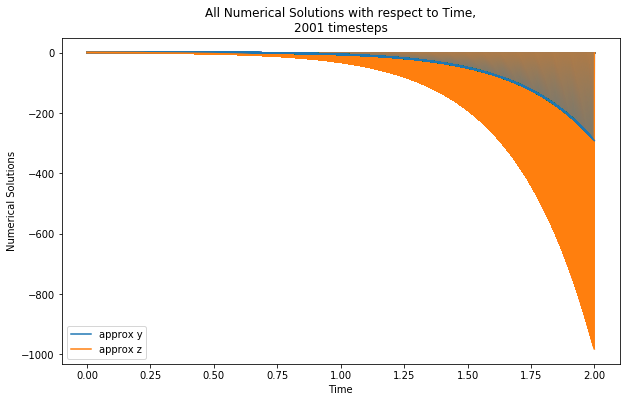

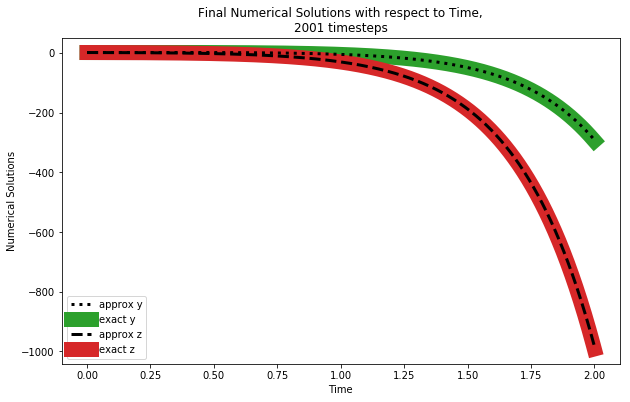

In [207]:
wq,x,y,z = eulm(2001)

In [176]:
wq.shape

(2001, 2)

In [175]:
wq[-10:]

array([[-282.36368599, -953.91376129],
       [-283.31759975, -956.98914798],
       [-284.2745889 , -960.07418812],
       [-285.23466308, -963.16891153],
       [-286.197832  , -966.27334811],
       [-287.16410534, -969.38752786],
       [-288.13349287, -972.51148086],
       [-289.10600435, -975.64523731],
       [-290.08164959, -978.78882747],
       [-291.06043842, -981.94228171]])

In [178]:
z[-10:]

array([-963.5491523 , -966.65917369, -969.77896965, -972.90857041,
       -976.04800629, -979.19730772, -982.35650518, -985.5256293 ,
       -988.70471076, -991.89378035])

In [211]:
import numpy as np

def mat_addition(A, B):
    if A.shape != B.shape:
        return False
    else:
        return np.sum([A,B])
    
a = np.arange(5*3).reshape(5,3)
b = np.arange(5*3, 5*3*2).reshape(5,3)
print(mat_addition(a,b))

435


In [1]:
[[0, 1, 3], [3, 5, 11],[5, 13, 14]]
[[0, 2, 12], [2, 4, 11], [2, 7, 13], [3, 7, 10]]
[[6, 9, 10], [4, 10, 14]]

In [1]:
[[0, 1, 3], [3, 7, 10], [3, 5, 11]]
[[0, 2, 12], [2, 4, 11], [2, 7, 13], ,[5, 13, 14]]
[[6, 9, 10], [4, 10, 14]]

In [1]:
testSeq1 = [[0, 1, 3], [0, 2, 12], [6, 9, 10], [2, 4, 11], [2, 7, 13], [3, 5, 11], [3, 7, 10], [4, 10, 14], [5, 13, 14]]

In [11]:
import networkx as nx
from networkx.algorithms import approximation

def disjointEdges(seqs):
    sets = [frozenset(s) for s in seqs]
    edges = []
    for i,s in enumerate(sets):
        for j in range(i+1, len(sets)):
            if s.isdisjoint(sets[j]):
                edges.append((s, sets[j]))
    
    return edges, sets

def disjointGraph(seqs):
    edges,sets = disjointEdges(seqs)
    g = nx.Graph()
    g.add_edges_from(edges)
    return g, sets

def largestDisjoint(seqs):
    g, sets = disjointGraph(seqs)
    sets = set(sets)
    largD = approximation.independent_set.maximum_independent_set(g)
    return largD, sets - largD

In [18]:
largD1, testSeq12 = largestDisjoint(testSeq1)
largD2, testSeq13 = largestDisjoint(testSeq12)
largD3, testSeq14 = largestDisjoint(testSeq13)
largD4, testSeq15 = largestDisjoint(testSeq14)

In [25]:
print(largD1)
print(largD2)
print(largD3)
print(testSeq15)

{frozenset({10, 3, 7}), frozenset({0, 1, 3}), frozenset({11, 3, 5})}
{frozenset({2, 11, 4}), frozenset({2, 13, 7}), frozenset({0, 2, 12})}
{frozenset({13, 5, 14})}
{frozenset({10, 4, 14}), frozenset({9, 10, 6})}


In [10]:

approximation.independent_set.maximum_independent_set(g)

{frozenset({3, 7, 10}), frozenset({0, 1, 3}), frozenset({3, 5, 11})}

In [13]:
edges = disjointEdges(testSeq1)

In [16]:
g = nx.Graph()
edges

frozenset

In [ ]:
approximation.independent_set.maximum_independent_set

In [37]:
from decimal import Decimal,ROUND_DOWN

a = Decimal(2.6)

In [33]:
a.quantize(Decimal(10))

Decimal('3')

In [44]:
Decimal('7.325').quantize(Decimal('.2'), rounding=ROUND_DOWN)

Decimal('7.3')

In [34]:
a

Decimal('2.600000000000000088817841970012523233890533447265625')

In [3]:
def quantize(value, numerator, denominator):
    #use the least common multiple, so I can get a
    #reference integer to round to.
    temp = round(value * numerator * denominator, 0)
    #return the re-normalized value
    return temp * numerator / float(denominator)

In [2]:
from decimal import Decimal, ROUND_FLOOR, ROUND_CEILING
def quantize2(number, numerator, denominator, rounding=ROUND_FLOOR):
    number, ratio = Decimal(number), Decimal(numerator/denominator) 
    return (number / ratio).quantize(Decimal(1), rounding=rounding) * ratio

In [3]:
from __future__ import division

def quantizeRound(value, numerator, denominator):
    ratio = (numerator/denominator)
    return (value + ratio/2) // ratio * ratio

In [1]:
# alternative Python 2/3 compatible version 
def quantizeRound(value, numerator, denominator):
    ratio = (float(numerator)/denominator)
    return (value + ratio/2.0) // ratio * ratio

In [17]:
from __future__ import division

def quantizeCeil(value, numerator, denominator):
    ratio = (numerator/denominator)
    return (value // ratio + 1) * ratio

In [31]:
from __future__ import division

def quantizeFloor(value, numerator, denominator):
    ratio = (numerator/denominator)
    return value // ratio * ratio

In [4]:
for denom in (2,4,8):
    for v in np.linspace(0,5,51):
        assert quantize(v, 1, denom) == quantizeRound(v, 1, denom)

In [5]:
vals = []
for denom in (2,4,8):
    for v in np.linspace(0,5,51):
        vals.append([quantize(v,1,denom), quantizeRound(v,1,denom)])
print(vals)

[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.5, 1.5], [1.5, 1.5], [1.5, 1.5], [1.5, 1.5], [1.5, 1.5], [2.0, 2.0], [2.0, 2.0], [2.0, 2.0], [2.0, 2.0], [2.0, 2.0], [2.5, 2.5], [2.5, 2.5], [2.5, 2.5], [2.5, 2.5], [2.5, 2.5], [3.0, 3.0], [3.0, 3.0], [3.0, 3.0], [3.0, 3.0], [3.0, 3.0], [3.5, 3.5], [3.5, 3.5], [3.5, 3.5], [3.5, 3.5], [3.5, 3.5], [4.0, 4.0], [4.0, 4.0], [4.0, 4.0], [4.0, 4.0], [4.0, 4.0], [4.5, 4.5], [4.5, 4.5], [4.5, 4.5], [4.5, 4.5], [4.5, 4.5], [5.0, 5.0], [5.0, 5.0], [5.0, 5.0], [0.0, 0.0], [0.0, 0.0], [0.25, 0.25], [0.25, 0.25], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.75, 0.75], [0.75, 0.75], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.25, 1.25], [1.25, 1.25], [1.5, 1.5], [1.5, 1.5], [1.5, 1.5], [1.75, 1.75], [1.75, 1.75], [2.0, 2.0], [2.0, 2.0], [2.0, 2.0], [2.25, 2.25], [2.25, 2.25], [2.5, 2.5], [2.5, 2.5], [2.5, 2.5], [2.75, 2.75], [2.75, 2.75], [3.0, 3.0], [3.

In [27]:
np.arange(10)*.5

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [30]:
vals = []
for denom in (2,4,8):
    for v in np.arange(10)*.5:
        val = ([quantizeRound(v,1,denom), quantizeCeil(v,1,denom), quantizeFloor(v,1,denom)])
        print(val)
        vals.append(val)

[0.0, 0.5, -0.0]
[0.5, 1.0, 0.5]
[1.0, 1.5, 1.0]
[1.5, 2.0, 1.5]
[2.0, 2.5, 2.0]
[2.5, 3.0, 2.5]
[3.0, 3.5, 3.0]
[3.5, 4.0, 3.5]
[4.0, 4.5, 4.0]
[4.5, 5.0, 4.5]
[0.0, 0.25, -0.0]
[0.5, 0.75, 0.5]
[1.0, 1.25, 1.0]
[1.5, 1.75, 1.5]
[2.0, 2.25, 2.0]
[2.5, 2.75, 2.5]
[3.0, 3.25, 3.0]
[3.5, 3.75, 3.5]
[4.0, 4.25, 4.0]
[4.5, 4.75, 4.5]
[0.0, 0.125, -0.0]
[0.5, 0.625, 0.5]
[1.0, 1.125, 1.0]
[1.5, 1.625, 1.5]
[2.0, 2.125, 2.0]
[2.5, 2.625, 2.5]
[3.0, 3.125, 3.0]
[3.5, 3.625, 3.5]
[4.0, 4.125, 4.0]
[4.5, 4.625, 4.5]


In [56]:
%%timeit
quantize(2.6, 1, 8)

833 ns ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [2]:
%%timeit
quantizeRound(2.6, 1, 8)

441 ns ± 9.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
%%timeit
quantizeCeil(2.6, 1, 8)

277 ns ± 3.49 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [32]:
%%timeit
quantizeFloor(2.6, 1, 8)

239 ns ± 2.63 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [12]:
notes = np.arange(10) + .6
print(quantizeRound(notes, 1, 8))

[0.625 1.625 2.625 3.625 4.625 5.625 6.625 7.625 8.625 9.625]


In [13]:
%%timeit
for n in notes:
    quantizeRound(n, 1, 8)

5.63 µs ± 40.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
%%timeit
quantizeRound(notes, 1, 8)

2.93 µs ± 20.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [133]:
def some_func(a, b):
    print("Hello")
    assert(len(a)==len(b))
    print("First assert")
    assert(a.all()<=0.99999)
    print("Second assert")
    return 1

In [131]:
np.testing.assert_raises(AssertionError, some_func, np.asarray([1, 2, 3]), np.asarray([1, 2, 3, 4, 5]))

Hello


In [134]:
np.testing.assert_array_less(some_func(np.asarray([1, 2, 3]), np.asarray([1, 2, 3])), np.inf)

Hello
First assert


AssertionError: 

In [ ]:
def kldiv(p, q):
    if not p.size == q.size:
        raise ValueError
    
    p,q = p.flat, q.flat
    return p*np.log(p/q)

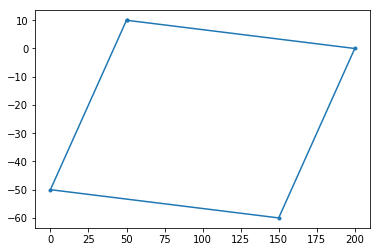

In [212]:
import matplotlib.pyplot as plt
x1 = np.array([50,0,150,200,50])
y1 = np.array([10,-50,-60,0,10])
plt.plot(x1,y1, '.-')

In [ ]:
def mxbpartial(m, b):
    def mxb(x):
        return m*x + b
    return mxb

def getmxb(xy0, xy1):
    dxy = xy1 - xy0
    m = dxy[1]/dxy[0]
    b = -m * xy0[0] + xy0[1]
    
    return mxbpartial(m, b)

def getmxbs(x, y):
    xy = np.array([x, y]).T
    return [getmxb(xy0,xy1) for xy0,xy1 in zip(xy[:-1], xy[1:])]
        
def intersect(m0, m1, b0, b1)
    return (b1 - b0)/(m0 - m1), (m0b1 - m1b0)/(m0 - m1)

In [242]:
def vecs(x,y):
    return np.array([np.diff(x), np.diff(y)])

In [244]:
vs = vecs(x1,y1)
gettheta(-vs.T[0], vs.T[1])

0.9426262143740172

In [247]:
gettheta(np.array((1,0)))

1.5707963267948966

In [238]:
from itertools import product
import numpy as np

def findvec(x, y):
    dx,dy = np.diff(x),np.diff(y)
    ix = (np.sign(dx) == np.sign(dy)).nonzero()
    return np.abs([dx[ix][0], dy[ix][0]])

def gettheta(v0, v1=(0,1)):
    return np.arccos(v0.dot(v1)/(np.linalg.norm(v0)*np.linalg.norm(v1)))

def rot(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

def makegrid(x, y, nx=10, ny=10):
    v = findvec(x, y)
    theta = gettheta(v)
    rr = rot(-theta)
    r = rot(theta)
    
    xy = np.array([x,y])
    xy = rr @ xy
    plt.plot(*xy)
    xlims,ylims = np.array([xy.min(axis=1), xy.max(axis=1)]).T
    grid = np.array(list(product(np.linspace(*xlims, nx), np.linspace(*ylims, ny))))
#     return grid,theta,rr,r
    return (r @ grid.T).T, theta, rr, r

(-65, 15)

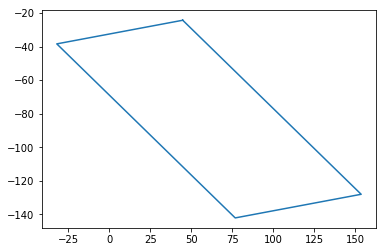

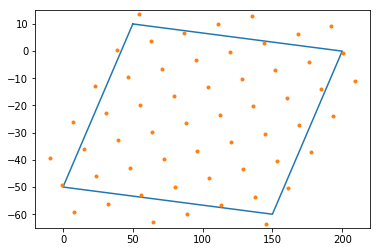

In [239]:
grid, theta, rr, r = makegrid(x1, y1)

fig = plt.figure()
ax = fig.gca()
ax.plot(x1,y1)
ax.plot(grid[:,0], grid[:,1], '.')
ax.set_ylim(-65, 15)

In [ ]:
xy = np.array([x1,y1])
fig = plt.figure()
ax = fig.gca()


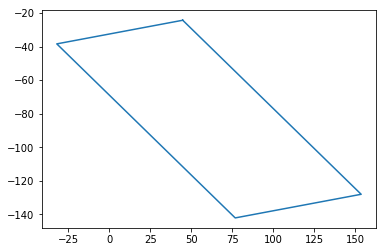

In [229]:
xy = np.array([x1,y1])
xy = rr @ xy
plt.plot(xy[0], xy[1])

In [171]:
rgrid = (rot(theta) @ grid.T).T

In [159]:
grid[:,0]

array([ 1.43295793e-01,  4.73622689e-02, -4.85712549e-02, -1.44504779e-01,
       -2.40438302e-01, -3.36371826e-01, -4.32305350e-01, -5.28238874e-01,
       -6.24172398e-01, -7.20105921e-01,  2.24296080e+01,  2.23336745e+01,
        2.22377410e+01,  2.21418075e+01,  2.20458739e+01,  2.19499404e+01,
        2.18540069e+01,  2.17580734e+01,  2.16621398e+01,  2.15662063e+01,
        4.47159203e+01,  4.46199867e+01,  4.45240532e+01,  4.44281197e+01,
        4.43321862e+01,  4.42362526e+01,  4.41403191e+01,  4.40443856e+01,
        4.39484521e+01,  4.38525186e+01,  6.70022325e+01,  6.69062990e+01,
        6.68103655e+01,  6.67144319e+01,  6.66184984e+01,  6.65225649e+01,
        6.64266314e+01,  6.63306978e+01,  6.62347643e+01,  6.61388308e+01,
        8.92885447e+01,  8.91926112e+01,  8.90966777e+01,  8.90007442e+01,
        8.89048106e+01,  8.88088771e+01,  8.87129436e+01,  8.86170101e+01,
        8.85210765e+01,  8.84251430e+01,  1.11574857e+02,  1.11478923e+02,
        1.11382990e+02,  

In [148]:
xy = np.array([x1,y1])
xlims,ylims = np.array([xy.min(axis=1), xy.max(axis=1)]).T

In [144]:
xy.min(axis=1)

array([  0, -60])

In [149]:
xlims

array([  0, 200])

In [150]:
ylims

array([-60,  10])

In [12]:
%%timeit
a = np.matrix(np.zeros((16, 16)))

4.95 µs ± 50.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%%timeit
a = np.zeros((16, 16))

495 ns ± 2.18 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
a = np.matrix(np.zeros((16, 16)))

In [10]:
a = np.arange(2*2).reshape(2,2)
b = np.arange(2*2, 2*2*2).reshape(2,2)
print('a\n%s\n' % a)
print('b\n%s\n' % b)
print('a * b (pairwise multiplication)\n%s\n' % (a * b))
print('a @ b (matrix multiplication)\n%s\n' % (a @ b))

a
[[0 1]
 [2 3]]

b
[[4 5]
 [6 7]]

a * b (pairwise multiplication)
[[ 0  5]
 [12 21]]

a @ b (matrix multiplication)
[[ 6  7]
 [26 31]]



In [ ]:
a = np.arange(3*3).reshape(3,3)
amat = np.matrix()
b = np.arange(2*2, 2*2*2).reshape(2,2)
print('a\n%s\n' % a)
print('b\n%s\n' % b)
print('a * b (pairwise multiplication)\n%s\n' % (a * b))
print('a @ b (matrix multiplication)\n%s\n' % (a @ b))

In [15]:
np.matmul(a, b)

array([[ 6,  7],
       [26, 31]])

In [36]:
F:list = [-1] * 50

def fib2(n: int) -> int:
    if n < 2:
        return n
    if F[n] != -1:
        return F[n]
    F[n] = fib2(n-1) + fib2(n-2)
    return F[n]

fib2(10)

55

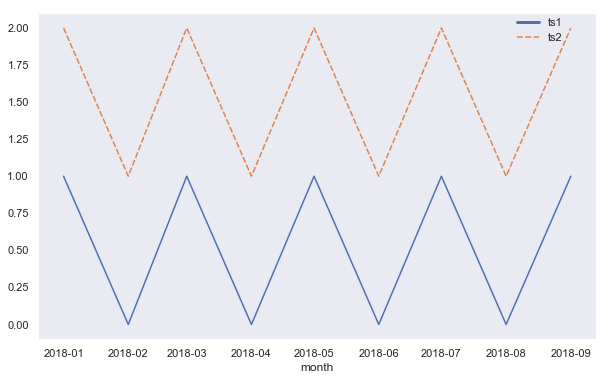

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_timeseries(*args):
    '''Plots all time series taken as arguments '''
    length = len(args[0])
    months = pd.date_range(start = '2018-01-01', periods = length, freq = 'MS')
    columns = dict()
    enum = enumerate(args)

    for i, series in enum:
        # Check arguments and handle errors
        if len(series) != length:
            raise ValueError('Time series are not of equal length.')
        if not isinstance(series, (np.ndarray, np.generic) ):
            raise ValueError('Arguments must be numpy arrays. {} is not!'.format(series))
        # name columns
        columns['ts{}'.format(i+1)] = series

    # create dataframe with all series    
    columns['month'] = months
    df = pd.DataFrame(columns).set_index('month')

    # plotting
    plt.figure(figsize=(10,6))    
    sns.set(style="dark")
    g = sns.lineplot(data=df)
    legend = plt.legend(bbox_to_anchor=(1.05, 1), frameon=False, loc=2, borderaxespad=0.)
    legend.legendHandles[0].set_linewidth(3.0)
    
    legend = plt.legend(bbox_to_anchor=(.85, 1), frameon=False, loc=2, borderaxespad=0.)
    legend.legendHandles[0].set_linewidth(3.0)
    
s1 = np.array([1,0,1,0,1,0,1,0,1])
s2 = s1 + 1
plot_timeseries(s1,s2)

In [51]:
arr = np.eye(10)
np.all((arr == 0).sum(axis=1))

True

In [54]:
arr = np.eye(10)
np.all(np.any(arr == 0, axis=1))

True

In [60]:
a = np.arange(5*5).reshape(5,5)
b = a.copy()
b[:, 3] = 0

print('a\n%s\n' % a)
print('b\n%s\n' % b)

print('method 1')
print(np.all((a == 0).sum(axis=1)))
print(np.all((b == 0).sum(axis=1)))
print()

print('method 2')
print(np.all(np.any(a == 0, axis=1)))
print(np.all(np.any(b == 0, axis=1)))

a
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

b
[[ 0  1  2  0  4]
 [ 5  6  7  0  9]
 [10 11 12  0 14]
 [15 16 17  0 19]
 [20 21 22  0 24]]

method 1
False
True

method 2
False
True


In [61]:
%%timeit
np.all((a == 0).sum(axis=1))

8.73 µs ± 56.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [62]:
%%timeit
np.all(np.any(a == 0, axis=1))

7.87 µs ± 54 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
np.any(a==0, axis=1)

array([ True, False, False, False, False])

In [49]:
print(np.arange(3*3).reshape(3,3))
np.arange(3*3).reshape(3,3).sum(axis=1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([ 3, 12, 21])

In [7]:
import pandas as pd

arr = np.random.rand(50)
d = np.random.rand(50)

df = pd.DataFrame({'x':d})

In [20]:
print(arr * df['x'])
print(arr * df['x'].values)

0     0.051354
1     0.234950
2     0.274923
3     0.021933
4     0.633902
5     0.253381
6     0.078245
7     0.204206
8     0.290228
9     0.157577
10    0.070575
11    0.525282
12    0.200446
13    0.347545
14    0.159708
15    0.236700
16    0.076383
17    0.254393
18    0.003688
19    0.562070
20    0.686317
21    0.058943
22    0.727648
23    0.312212
24    0.026188
25    0.214044
26    0.476534
27    0.446399
28    0.118171
29    0.351616
30    0.336203
31    0.753759
32    0.431749
33    0.841653
34    0.262199
35    0.049848
36    0.515817
37    0.277982
38    0.402921
39    0.135258
40    0.002860
41    0.141723
42    0.033561
43    0.175552
44    0.512918
45    0.610260
46    0.086994
47    0.002289
48    0.547740
49    0.003786
Name: x, dtype: float64
[0.05135418 0.23494954 0.27492257 0.02193282 0.63390229 0.25338132
 0.07824524 0.20420586 0.29022794 0.15757675 0.07057451 0.52528196
 0.20044594 0.34754509 0.1597078  0.23670002 0.076383   0.25439335
 0.00368842 0.56206988 0.

In [24]:
%%prun
arr * df['x'].values

         16 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:2(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 frame.py:1940(__getitem__)
        1    0.000    0.000    0.000    0.000 base.py:1638(__contains__)
        1    0.000    0.000    0.000    0.000 generic.py:1640(_get_item_cache)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 common.py:435(_apply_if_callable)
        1    0.000    0.000    0.000    0.000 frame.py:1966(_getitem_column)
        1    0.000    0.000    0.000    0.000 internals.py:150(external_values)
        1    0.000    0.000    0.000    0.000 internals.py:4218(external_values)
        1    0.000    0.000    0.000    0.000 series.py:351(values)
        1    

In [25]:
%%prun
np.multiply(arr, df['x'].values)

         16 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:2(<module>)
        1    0.000    0.000    0.000    0.000 frame.py:1940(__getitem__)
        1    0.000    0.000    0.000    0.000 base.py:1638(__contains__)
        1    0.000    0.000    0.000    0.000 frame.py:1966(_getitem_column)
        1    0.000    0.000    0.000    0.000 generic.py:1640(_get_item_cache)
        1    0.000    0.000    0.000    0.000 internals.py:4218(external_values)
        1    0.000    0.000    0.000    0.000 common.py:435(_apply_if_callable)
        1    0.000    0.000    0.000    0.000 internals.py:150(external_values)
        1    0.000    0.000    0.000    0.000 series.py:351(values)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.callable}
        1    0.

In [28]:
from collections import OrderedDict

def memoize(f, k):
    cache = OrderedDict()

    def mem_f(*args):
        if args in cache:
            return cache[args]
        result = f(*args)
        if len(cache) >= k:
            cache.popitem(last=False)
        cache[args]= result
        return result 
    return mem_f,cache

In [31]:
def mysum(a, b):
    return a + b

mysum_cached,cache = memoize(mysum, 10)
for i in range(100)
    mysum_cached(i, i)

print(cache)

OrderedDict([((90, 90), 180), ((91, 91), 182), ((92, 92), 184), ((93, 93), 186), ((94, 94), 188), ((95, 95), 190), ((96, 96), 192), ((97, 97), 194), ((98, 98), 196), ((99, 99), 198)])


In [ ]:
spark = (SparkSession.builder
     .appName("Oncofinder -- Preprocessing")
     .getOrCreate())

samples = preprocess_spark(spark, [1])

if save_jpegs: #SET TO TRUE
    save_rdd_2_jpeg(samples, './data/images')


def save_rdd_2_jpeg(rdd, save_dir):
    for sample in rdd.collect():
        save_nonlabelled_sample_2_jpeg(sample, save_dir)

def save_nonlabelled_sample_2_jpeg(sample, save_dir):
    slide_num, img_value = sample
    filename = '{slide_num}_{hash}.jpeg'.format(
        slide_num=slide_num, hash=np.random.randint(1e4))
    filepath = os.path.join(save_dir, filename)
    save_jpeg_help(img_value, filepath)

def save_jpeg_help(img_value, filepath):
    dir = os.path.dirname(filepath)
    os.makedirs(dir, exist_ok=True)
    img = Image.fromarray(img_value.astype(np.uint8), 'RGB')
    img.save(filepath)


def preprocess_spark(spark, slide_nums, folder="data", training=False, tile_size=1024, overlap=0,
               tissue_threshold=0.9, sample_size=256, grayscale=False, normalize_stains=True,
               num_partitions=20000):

    slides = (spark.sparkContext
              .parallelize(slide_nums)
              .filter(lambda slide: open_slide(slide, folder, training) is not None))
    tile_indices = (slides.flatMap(
        lambda slide: process_slide(slide, folder, training, tile_size, overlap)))
    tile_indices = tile_indices.repartition(num_partitions)
    tile_indices.cache()

    tiles = tile_indices.map(lambda tile_index: process_tile_index(tile_index, folder, training))
    filtered_tiles = tiles.filter(lambda tile: keep_tile(tile, tile_size, tissue_threshold))
    samples = filtered_tiles.flatMap(lambda tile: process_tile(tile, sample_size, grayscale))
    if normalize_stains:
        samples = samples.map(lambda sample: normalize_staining(sample))

    return samples

In [13]:
import pandas as pd

d = '''0   1   2   3   4
A   Y   N   N   Y
B   N   Y   N   N
C   N   N   N   N
D   Y   Y   N   Y
E   N   Y   Y   Y
F   Y   Y   N   Y
G   Y   N   N   Y'''

df = pd.read_csv(pd.compat.StringIO(d), sep='\s+')

totalcount = df[['3','4']].melt().value.value_counts(normalize=True) * 100
print('percentage of times each value appears as an entry in either column\n%s\n' % totalcount)

paircount = (df['3'] + df['4']).value_counts(normalize=True) * 100
print('percentage of times each pair of values occurs across columns\n%s\n' % paircount)

percentage of times each value appears as an entry in either column
N    57.142857
Y    42.857143
Name: value, dtype: float64

percentage of times each pair of values occurs across columns
NY    57.142857
NN    28.571429
YY    14.285714
dtype: float64



In [4]:
import pandas as pd

d = '''0   1   2   3   4
A   Y   N   N   Y
B   N   Y   N   N
C   N   N   N   N
D   Y   Y   N   Y
E   N   Y   Y   Y
F   Y   Y   N   Y
G   Y   N   N   Y'''

df = pd.read_table(pd.compat.StringIO(d), sep='\s+')

In [12]:
df = pd.read_clipboard()
df['1'].dtype

dtype('O')

In [33]:
import numpy as np
import sympy as sp
import itertools as it
from sympy.abc import x, y, z

class Solver:
    def __init__(self, vmat):
        self._vfunc = sp.lambdify((x, y, z),
                                  expr=vmat,
                                  modules='numpy')
        self._q_count, self._qs = None, []  # these depend on ksep!

    ################################################################
    # How to vectorize this?
    def eval_s(self, stiff):
        assert len(self._qs) == self._q_count, "Run 'populate_qs' first!"
        result = 0
        for k in self._qs:
            evs = np.linalg.eigvalsh(self._vfunc(*k))
            result += np.sum(np.divide(1., (stiff + evs)))
        return result.real - 4 * self._q_count
    ################################################################

    def populate_qs(self, ksep: float = 1.7):
        self._qs = np.array([(kx, ky, kz) for kx, ky, kz
                    in it.product(np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep))])
        self._q_count = len(self._qs)


def test():
    vmat = sp.Matrix([[1, sp.cos(x/4+y/4), sp.cos(x/4+z/4), sp.cos(y/4+z/4)],
                      [sp.cos(x/4+y/4), 1, sp.cos(y/4-z/4), sp.cos(x/4 - z/4)],
                      [sp.cos(x/4+z/4), sp.cos(y/4-z/4), 1, sp.cos(x/4-y/4)],
                      [sp.cos(y/4+z/4), sp.cos(x/4-z/4), sp.cos(x/4-y/4), 1]]) * 2
    solver = Solver(vmat)
    solver.populate_qs(ksep=.5)  # <---- Performance starts to worsen (in eval_s) when ksep is reduced!
    print(solver.eval_s(0.65))

In [37]:
import numpy as np
import sympy as sp
import itertools as it
from sympy.abc import x, y, z


class Solver:
    def __init__(self, vmat):
        self._vfunc = sp.lambdify((x, y, z),
                                  expr=vmat,
                                  modules='numpy')
        self._q_count, self._qs = None, []  # these depend on ksep!

    ################################################################
    # How to vectorize this?
    def eval_s(self, stiff):
        assert len(self._qs) == self._q_count, "Run 'populate_qs' first!"
        mats = np.stack([self._vfunc(*k) for k in self._qs], axis=0)
        evs = np.linalg.eigvalsh(mats)
        result = np.sum(np.divide(1., (stiff + evs)))
        return result.real - 4 * self._q_count
    ################################################################

    def populate_qs(self, ksep: float = 1.7):
        self._qs = np.array([(kx, ky, kz) for kx, ky, kz
                    in it.product(np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep))])
        self._q_count = len(self._qs)


def test():
    vmat = sp.Matrix([[1, sp.cos(x/4+y/4), sp.cos(x/4+z/4), sp.cos(y/4+z/4)],
                      [sp.cos(x/4+y/4), 1, sp.cos(y/4-z/4), sp.cos(x/4 - z/4)],
                      [sp.cos(x/4+z/4), sp.cos(y/4-z/4), 1, sp.cos(x/4-y/4)],
                      [sp.cos(y/4+z/4), sp.cos(x/4-z/4), sp.cos(x/4-y/4), 1]]) * 2
    solver = Solver(vmat)
    solver.populate_qs(ksep=.3)  # <---- Performance starts to worsen (in eval_s) when ksep is reduced!
    print(solver.eval_s(0.65))

In [87]:
import numpy as np
import sympy as sp
import itertools as it
from sympy.abc import o, x, y, z

class Solver:
    def __init__(self, vmat):
        self._vfunc = sp.lambdify((o, x, y, z),
                                  expr=vmat,
                                  modules='numpy')
        self._q_count, self._qs = None, []  # these depend on ksep!

    ################################################################
    # How to vectorize this?
    def eval_s(self, stiff):
        assert len(self._qs) == self._q_count, "Run 'populate_qs' first!"
        oarr = np.ones(len(self._qs))
        mats = self._vfunc(oarr, *self._qs.T).T
        print(mats[0])
        evs = np.linalg.eigvalsh(mats)
        result = np.sum(np.divide(1., (stiff + evs)))
        return result.real - 4 * self._q_count
    ################################################################

    def populate_qs(self, ksep: float = 1.7):
        self._qs = np.array([(kx, ky, kz) for kx, ky, kz
                    in it.product(np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep))])
        self._q_count = len(self._qs)

def test():
    vmat = sp.Matrix([[o, sp.cos(x/4+y/4), sp.cos(x/4+z/4), sp.cos(y/4+z/4)],
                      [sp.cos(x/4+y/4), o, sp.cos(y/4-z/4), sp.cos(x/4 - z/4)],
                      [sp.cos(x/4+z/4), sp.cos(y/4-z/4), o, sp.cos(x/4-y/4)],
                      [sp.cos(y/4+z/4), sp.cos(x/4-z/4), sp.cos(x/4-y/4), o]]) * 2
    solver = Solver(vmat)
    solver.populate_qs(ksep=.3)  # <---- Performance starts to worsen (in eval_s) when ksep is reduced!
    print(solver.eval_s(0.65))

In [94]:
import numpy as np
import sympy as sp
import itertools as it
from sympy.abc import x, y, z

class Solver:
    def __init__(self, vmat):
        self._vfunc = sp.lambdify((x, y, z),
                                  expr=vmat,
                                  modules='numpy')
        self._q_count, self._qs = None, []  # these depend on ksep!

    ################################################################
    # How to vectorize this?
    def eval_s_vectorized_completely(self, stiff):
        assert len(self._qs) == self._q_count, "Run 'populate_qs' first!"
        mats = self._vfunc(*self._qs.T).T
        # fix the diagonals of the submats
        for i in range(4): mats[:,i,i] = 2
        evs = np.linalg.eigvalsh(mats)
        result = np.sum(np.divide(1., (stiff + evs)))
        return result.real - 4 * self._q_count
    ################################################################

    def populate_qs(self, ksep: float = 1.7):
        self._qs = np.array([(kx, ky, kz) for kx, ky, kz
                    in it.product(np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep))])
        self._q_count = len(self._qs)


def test():
    vmat = sp.Matrix([[x, sp.cos(x/4+y/4), sp.cos(x/4+z/4), sp.cos(y/4+z/4)],
                      [sp.cos(x/4+y/4), x, sp.cos(y/4-z/4), sp.cos(x/4 - z/4)],
                      [sp.cos(x/4+z/4), sp.cos(y/4-z/4), x, sp.cos(x/4-y/4)],
                      [sp.cos(y/4+z/4), sp.cos(x/4-z/4), sp.cos(x/4-y/4), x]]) * 2
    solver = Solver(vmat)
    solver.populate_qs(ksep=.3)  # <---- Performance starts to worsen (in eval_s) when ksep is reduced!
    print(solver.eval_s_vectorized_completely(0.65))

In [103]:
import numpy as np
import sympy as sp
import itertools as it
from sympy.abc import x, y, z
from sp.utilities.lambdify import implemented_function

# lfuncs = {'tan': lambda x: np.ones(len(x))}
xones = implemented_function('xones', lambda x: np.ones(len(x)))

class Solver:
    def __init__(self, vmat):
        self._vfunc = sp.lambdify((x, y, z),
                                  expr=vmat,
                                  modules=[lfuncs, 'numpy'])
        self._q_count, self._qs = None, []  # these depend on ksep!

    ################################################################
    # How to vectorize this?
    def eval_s_vectorized_completely(self, stiff):
        assert len(self._qs) == self._q_count, "Run 'populate_qs' first!"
        mats = self._vfunc(*self._qs.T).T
        evs = np.linalg.eigvalsh(mats)
        result = np.sum(np.divide(1., (stiff + evs)))
        return result.real - 4 * self._q_count
    ################################################################

    def populate_qs(self, ksep: float = 1.7):
        self._qs = np.array([(kx, ky, kz) for kx, ky, kz
                    in it.product(np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep))])
        self._q_count = len(self._qs)


def test():
    vmat = sp.Matrix([[sp.tan(x), sp.cos(x/4+y/4), sp.cos(x/4+z/4), sp.cos(y/4+z/4)],
                      [sp.cos(x/4+y/4), sp.tan(x), sp.cos(y/4-z/4), sp.cos(x/4 - z/4)],
                      [sp.cos(x/4+z/4), sp.cos(y/4-z/4), sp.tan(x), sp.cos(x/4-y/4)],
                      [sp.cos(y/4+z/4), sp.cos(x/4-z/4), sp.cos(x/4-y/4), sp.tan(x)]]) * 2
    solver = Solver(vmat)
    solver.populate_qs(ksep=.3)  # <---- Performance starts to worsen (in eval_s) when ksep is reduced!
    print(solver.eval_s_vectorized_completely(0.65))

In [5]:
import itertools as it
import numpy as np
import sympy as sp
from sympy.abc import x, y, z
from sympy.core.numbers import Number
from sympy.utilities.lambdify import implemented_function

xones = implemented_function('xones', lambda x: np.ones(len(x)))
lfuncs = {'xones': xones}

def vectorizemat(mat):
    ret = mat.copy()
    # get the first element of the set of symbols that mat uses
    for x in mat.free_symbols: break
    for i,j in it.product(*(range(s) for s in mat.shape)):
        if isinstance(mat[i,j], Number):
            ret[i,j] = xones(x) * mat[i,j]
    return ret
    
class Solver:
    def __init__(self, vmat):
        self._vfunc = sp.lambdify((x, y, z),
                                  expr=vectorizemat(vmat),
                                  modules=[lfuncs, 'numpy'])
        self._q_count, self._qs = None, []  # these depend on ksep!

    def eval_s_vectorized_completely(self, stiff):
        assert len(self._qs) == self._q_count, "Run 'populate_qs' first!"
        evs = np.linalg.eigvalsh(self._vfunc(*self._qs.T).T)
        result = np.sum(np.divide(1., (stiff + evs)))
        return result.real - 4 * self._q_count

    def populate_qs(self, ksep: float = 1.7):
        self._qs = np.array([(kx, ky, kz) for kx, ky, kz
                    in it.product(np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep),
                                  np.arange(-3*np.pi, 3.01*np.pi, ksep))])
        self._q_count = len(self._qs)

def test():
    vmat = sp.Matrix([[1, sp.cos(x/4+y/4), sp.cos(x/4+z/4), sp.cos(y/4+z/4)],
                      [sp.cos(x/4+y/4), 1, sp.cos(y/4-z/4), sp.cos(x/4 - z/4)],
                      [sp.cos(x/4+z/4), sp.cos(y/4-z/4), 1, sp.cos(x/4-y/4)],
                      [sp.cos(y/4+z/4), sp.cos(x/4-z/4), sp.cos(x/4-y/4), 1]]) * 2
    solver = Solver(vmat)
    solver.populate_qs(ksep=.3)  # <---- Performance starts to worsen (in eval_s) when ksep is reduced!
    print(solver.eval_s_vectorized_completely(0.65))

In [6]:
test()

-85240.46154498367


In [34]:
# old version for ksep=.3
import timeit
print(timeit.timeit("test()", setup="from __main__ import test", number=10))

-85240.46154500882
-85240.46154500882
-85240.46154500882
-85240.46154500882
-85240.46154500882
-85240.46154500882
-85240.46154500882
-85240.46154500882
-85240.46154500882
-85240.46154500882
118.42847006605007


In [38]:
# vectorized version for ksep=.3
import timeit
print(timeit.timeit("test()", setup="from __main__ import test", number=10))

-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
64.95763925800566


In [3]:
# completely vectorized version for ksep=.3
import timeit
print(timeit.timeit("test()", setup="from __main__ import test", number=10))

-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
-85240.46154498367
5.648927717003971


In [73]:
def getgrid(K, d):
    coords = [np.linspace(-1.0 , 1.0, num=K + 1) for i in range(d)]
    return np.stack(np.meshgrid(*coords)).T

In [66]:
g = getgrid(2,2)
g[(slice(None,2), slice(None,2))]

array([[[-1., -1.],
        [ 0., -1.]],

       [[-1.,  0.],
        [ 0.,  0.]]])

In [94]:
from itertools import product
import numpy as np

def splitcubes(K, d):
    coords = [np.linspace(-1.0 , 1.0, num=K + 1) for i in range(d)]
    grid = np.stack(np.meshgrid(*coords)).T
    
    mid = (K + 1)//2
    for slices in product(*([(slice(None, mid + 1), slice(mid, None))]*d)):
        yield grid[slices]
        
def cubesets(K, d):
    return [set(tuple(p.tolist()) for p in c.reshape(-1, d)) for c in splitcubes(K, d)]

In [76]:
from itertools import product
import numpy as np

def splitcubes(K, d):
    coords = [np.linspace(-1.0 , 1.0, num=K + 1) for i in range(d)]
    grid = np.stack(np.meshgrid(*coords)).T
    
    ks = list(range(1, K))
    for slices in product(*([[slice(b,e) for b,e in zip([None] + ks, [k+1 for k in ks] + [None])]]*d)):
        yield grid[slices]
        
def cubesets(K, d):
    if (K & (K - 1)) or K < 2:
        raise ValueError('K must be a positive power of 2. K: %s' % K)

    return [set(tuple(p.tolist()) for p in c.reshape(-1, d)) for c in splitcubes(K, d)]

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


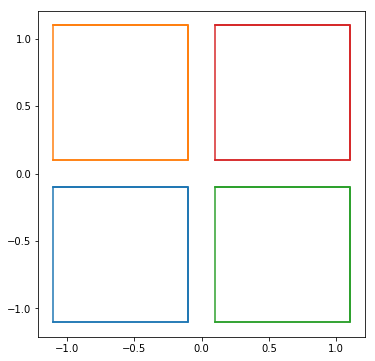

In [89]:
import matplotlib.pyplot as plt

def assemblecube(c, spread=.03):
    c = np.array(list(c))
    c = c[np.lexsort(c.T[::-1])]
    
    d = int(np.log2(c.size))
    for i in range(d):
        c[2**i:2**i + 2] = c[2**i + 1:2**i - 1:-1]
    
    # get the point farthest from the origin
    sp = c[np.argmax((c**2).sum(axis=1)**.5)]
    # shift all points a small distance towards that farthest point
    c += sp * .1 #np.copysign(np.ones(sp.size)*spread, sp)
    
    # create several different orderings of the same points so that matplotlib will draw a closed shape
    return [(np.roll(c, i, axis=1) - (np.roll(c, i, axis=1)[0] - c[0])[None,:]).T for i in range(d)]

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

for i,c in enumerate(cubesets(2, 2)):
    for cdata in assemblecube(c):
        p = ax.plot(*cdata, c='C%d' % (i % 9))

ax.set_aspect('equal', 'box')
fig.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


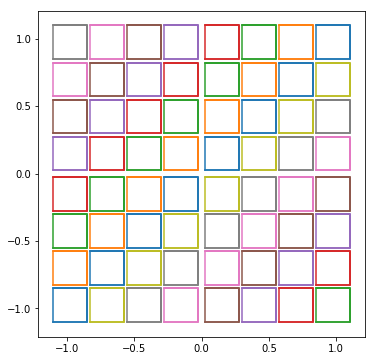

In [95]:
import matplotlib.pyplot as plt

def assemblecube(c, spread=.03):
    c = np.array(list(c))
    c = c[np.lexsort(c.T[::-1])]
    
    d = int(np.log2(c.size))
    for i in range(d):
        c[2**i:2**i + 2] = c[2**i + 1:2**i - 1:-1]
    
    # get the point farthest from the origin
    sp = c[np.argmax((c**2).sum(axis=1)**.5)]
    # shift all points a small distance towards that farthest point
    c += sp * .1 #np.copysign(np.ones(sp.size)*spread, sp)
    
    # create several different orderings of the same points so that matplotlib will draw a closed shape
    return [(np.roll(c, i, axis=1) - (np.roll(c, i, axis=1)[0] - c[0])[None,:]).T for i in range(d)]

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

for i,c in enumerate(cubesets(8, 2)):
    for cdata in assemblecube(c):
        p = ax.plot(*cdata, c='C%d' % (i % 9))

ax.set_aspect('equal', 'box')
fig.show()

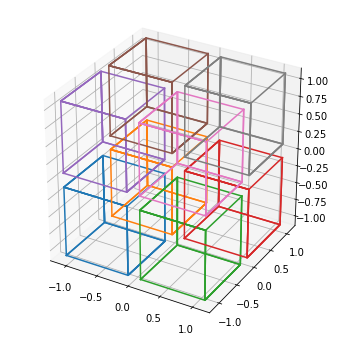

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for i,c in enumerate(cubesets(2,3)):
    for cdata in assemblecube(c, spread=.05):
        ax.plot(*cdata, c=('C%d' % (i % 9)))
        
plt.gcf().gca().set_aspect('equal', 'box')
plt.show()

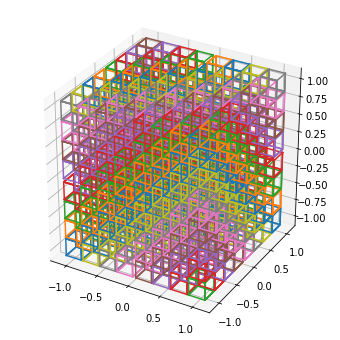

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for i,c in enumerate(cubesets(8,3)):
    for cdata in assemblecube(c, spread=.05):
        ax.plot(*cdata, c=('C%d' % (i % 9)))
        
plt.gcf().gca().set_aspect('equal', 'box')
plt.show()

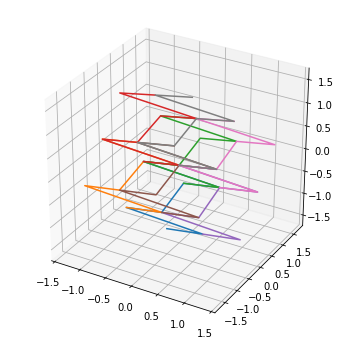

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numbers import Number
import numpy as np
import scipy.linalg as spl

def rot(axis, theta, n=3):
    if isinstance(axis, Number):
        ix = axis
        axis = np.zeros(n)
        axis[ix] = 1

    return spl.expm(np.cross(np.eye(n), axis/spl.norm(axis)*theta))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
colors = ['C%d' % i for i in range(2**3)]

rot3 = rot(0,np.pi/4) @ rot(1,np.pi/3) @ rot(2,np.pi/2)

for c,color in zip(cubesets(2,3), colors):
    cdata = rot3 @ np.array(sorted(c)).T
    ax.plot(*cdata, c=color)
        
# plt.gcf().gca().set_aspect('equal', 'box')
plt.show()

In [1]:
import numpy as np
import scipy.linalg as spl

def rot(axis, theta):
    return spl.expm(np.cross(np.eye(len(axis)), axis/spl.norm(axis)*theta))

rot3 = rot((1,0,0), np.pi/4) @ rot((0,1,0), np.pi/3) @ rot((0,0,1), np.pi/2)

points = np.array([[1, 0, 1, 1, 1, 0, 0, 0],
                   [0, 0, 0, 1, 1, 1, 0, 1],
                   [1, 1, 0, 1, 0, 1, 0, 0]])

points = rot3 @ points

In [103]:
with np.printoptions(linewidth=9999):
    print(repr(points))

array([[ 0.8660254 ,  0.8660254 ,  0.        ,  0.3660254 , -0.5       ,  0.3660254 ,  0.        , -0.5       ],
       [ 0.35355339, -0.35355339,  0.70710678, -0.25881905,  0.09473435, -0.96592583,  0.        , -0.61237244],
       [ 1.06066017,  0.35355339,  0.70710678,  1.67303261,  1.31947922,  0.96592583,  0.        ,  0.61237244]])


In [116]:
R = rot3
A = points.T
np.testing.assert_array_equal((R @ A.T).T, A @ R.T)

In [2]:
p = points.copy()
pb = np.broadcast_to(p, (8,3,8)).T
d = (p - pb)
print(d[1,...].T)
print((d[0,...] * d[0,0,...]).sum(axis=0))
# bdot = (d[0,...,None] * d[0,:,None,:]).sum(axis=0)
bdot = (d[...,None] * d[...,None,:]).sum(axis=1)
print(np.isclose(bdot, 0)[0].nonzero()[0].size)

[[ 0.          0.70710678  0.70710678]
 [ 0.          0.          0.        ]
 [-0.8660254   1.06066017  0.35355339]
 [-0.5         0.09473435  1.31947922]
 [-1.3660254   0.44828774  0.96592583]
 [-0.5        -0.61237244  0.61237244]
 [-0.8660254   0.35355339 -0.35355339]
 [-1.3660254  -0.25881905  0.25881905]]
[0.         0.         0.75       0.25       1.8660254  0.95710678
 1.97474487 3.79787706]
27


In [13]:
d = (p[..., None] - p[..., None, :])
isortho = np.isclose((d[..., None] * d[..., None, :]).sum(axis=0), 0)
sum4d = (d[..., None, None] + d[..., None, None, :, :])
isrect = np.isclose((d[..., None, None] - sum4d).sum(axis=0), 0)

In [54]:
isortho.shape

(8, 8, 8)

In [14]:
isrect.shape

(8, 8, 8, 8)

In [91]:
isortho.nonzero()[0].size

216

In [92]:
216/24

9.0

In [4]:
ixs = np.array(isortho.nonzero()).T

In [17]:
ixs = (isortho[..., None] & isrect).nonzero()

In [15]:
ixs = (isrect).nonzero()

In [86]:
np.array(ixs)[2] == np.array(ixs)[3]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [16]:
np.array(ixs).T

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 2, 2],
       ...,
       [7, 7, 5, 5],
       [7, 7, 6, 6],
       [7, 7, 7, 7]])

In [18]:
np.array(ixs).T

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 2, 2],
       [0, 0, 3, 3],
       [0, 0, 4, 4],
       [0, 0, 5, 5],
       [0, 0, 6, 6],
       [0, 0, 7, 7],
       [0, 1, 0, 0],
       [0, 1, 2, 2],
       [0, 1, 3, 3],
       [0, 1, 4, 4],
       [0, 2, 0, 0],
       [0, 2, 1, 1],
       [0, 2, 3, 3],
       [0, 2, 5, 5],
       [0, 3, 0, 0],
       [0, 3, 1, 1],
       [0, 3, 2, 2],
       [0, 3, 6, 6],
       [0, 4, 0, 0],
       [0, 4, 1, 1],
       [0, 5, 0, 0],
       [0, 5, 2, 2],
       [0, 6, 0, 0],
       [0, 6, 3, 3],
       [0, 7, 0, 0],
       [1, 0, 1, 1],
       [1, 0, 5, 5],
       [1, 0, 6, 6],
       [1, 0, 7, 7],
       [1, 1, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 2, 2],
       [1, 1, 3, 3],
       [1, 1, 4, 4],
       [1, 1, 5, 5],
       [1, 1, 6, 6],
       [1, 1, 7, 7],
       [1, 2, 1, 1],
       [1, 2, 5, 5],
       [1, 3, 1, 1],
       [1, 3, 6, 6],
       [1, 4, 1, 1],
       [1, 5, 0, 0],
       [1, 5, 1, 1],
       [1, 5, 2, 2],
       [1, 5,

In [5]:
subsets = set(frozenset(row.tolist()) for row in ixs if len(frozenset(row.tolist()))==3)

In [6]:
len(subsets)

48

In [7]:
subsetarr = np.array(sorted(tuple(s) for s in subsets))
subsetarr = subsetarr[np.lexsort(subsetarr[None,:,1])]

In [8]:
print(subsetarr)

[[0 1 2]
 [0 1 3]
 [0 1 4]
 [0 1 5]
 [0 1 6]
 [0 1 7]
 [0 2 3]
 [0 2 4]
 [0 2 5]
 [0 2 6]
 [0 2 7]
 [1 2 4]
 [1 2 5]
 [1 2 6]
 [0 3 4]
 [0 3 5]
 [0 3 6]
 [0 3 7]
 [1 3 4]
 [1 3 5]
 [1 3 6]
 [2 3 4]
 [2 3 5]
 [2 3 6]
 [0 4 7]
 [1 4 5]
 [1 4 6]
 [1 4 7]
 [2 4 5]
 [2 4 6]
 [2 4 7]
 [3 4 5]
 [3 4 6]
 [3 4 7]
 [0 5 7]
 [1 5 6]
 [1 5 7]
 [2 5 6]
 [2 5 7]
 [3 5 6]
 [3 5 7]
 [4 5 7]
 [0 6 7]
 [1 6 7]
 [2 6 7]
 [3 6 7]
 [4 6 7]
 [5 6 7]]


In [132]:
p.T[[tuple(row) for row in subsetarr]].shape

(48, 3, 3)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


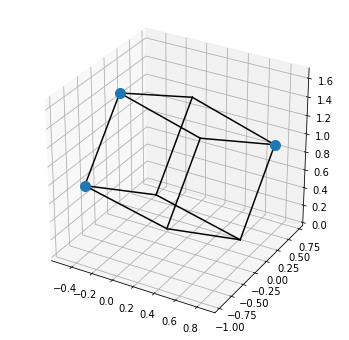

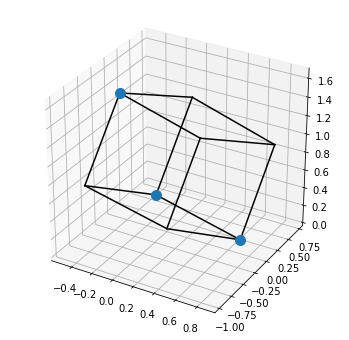

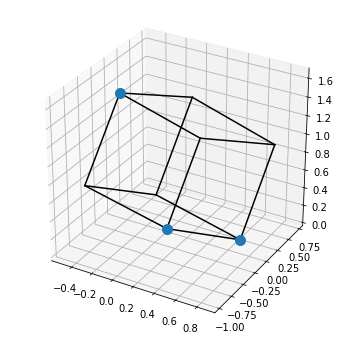

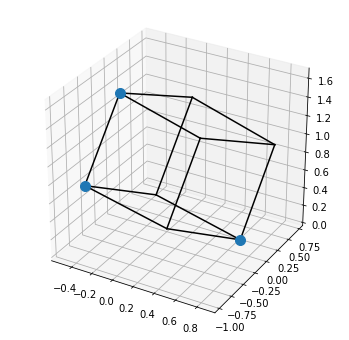

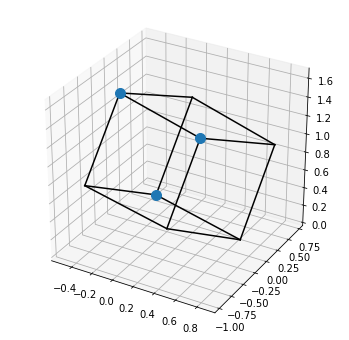

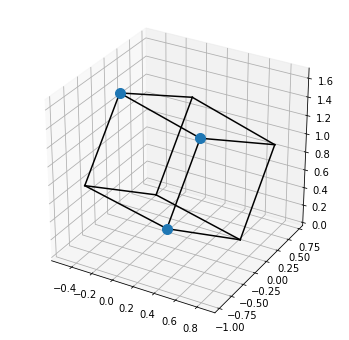

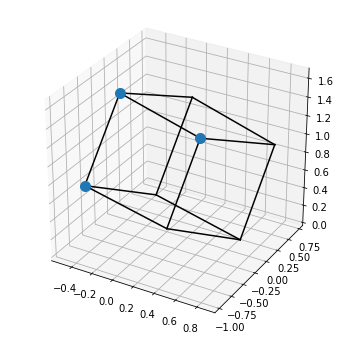

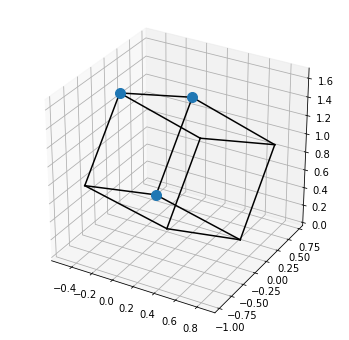

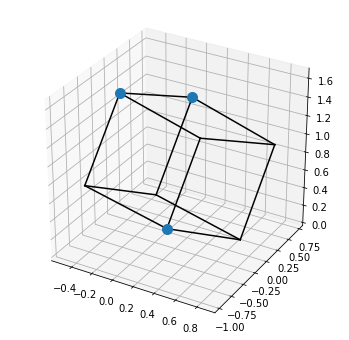

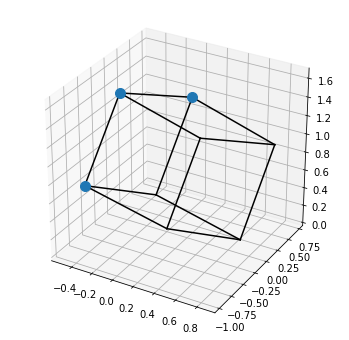

In [12]:
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Get pairs of points for plotting the lines of the cube:
all_pairs_of_points = list(combinations(p.T, 2))

# Keep only points with distance equal to 1, to avoid drawing diagonals:
neighbouring_points = [list(zip(list(p1), list(p2))) for p1, p2 in all_pairs_of_points if np.abs(np.sqrt(np.sum((p1 - p2)**2)) - 1) < 0.0001]


# for orthos in p.T[[tuple(row) for row in subsetarr]][:6]:
for orthos in p.T[subsetarr[subsetarr[:,1]==4]]:
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    # Draw cube:
    for point_pair in neighbouring_points:
        ax.plot(point_pair[0], point_pair[1], point_pair[2], 'k')
    
    ax.plot(*orthos.T, '.', ms=20)
    fig.show()

In [183]:
p.T[ix].shape

/Users/tel/git/ipykernel/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: too many indices for array

In [186]:
pt = p.T.copy()

In [190]:
p.T[np.array(ix[:10])].shape

(10, 3, 3)

In [163]:
tuple(ixlim)

((0, 4, 7),
 (1, 4, 5),
 (1, 4, 6),
 (1, 4, 7),
 (2, 4, 5),
 (2, 4, 6),
 (2, 4, 7),
 (3, 4, 5),
 (3, 4, 6),
 (3, 4, 7))

In [157]:
p.shape

(3, 8)

In [191]:
ixlim = [tuple(row) for row in subsetarr[subsetarr[:,1]==4]]
ix = [tuple(row) for row in subsetarr]

In [161]:
type(ix[0])

tuple

In [118]:
subsetarr[None,:,1]

array([[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 6, 2, 2, 2, 3,
        3, 3, 4, 4, 4, 5, 5, 6, 3, 3, 3, 4, 4, 4, 5, 5, 6, 4, 4, 4, 5, 5,
        6, 5, 6, 6]])

In [119]:
np.lexsort(subsetarr[None,:,1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 18, 19, 20, 11, 12, 13,
       14, 21, 22, 23, 30, 31, 32, 15, 24, 25, 26, 33, 34, 35, 39, 40, 41,
       16, 27, 28, 36, 37, 42, 43, 45, 17, 29, 38, 44, 46, 47])

In [22]:
d[...,0]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678],
       [ 0.8660254 , -0.35355339,  0.35355339],
       [ 0.5       ,  0.61237244, -0.61237244],
       [ 1.3660254 ,  0.25881905, -0.25881905],
       [ 0.5       ,  1.31947922,  0.09473435],
       [ 0.8660254 ,  0.35355339,  1.06066017],
       [ 1.3660254 ,  0.96592583,  0.44828774]])

In [40]:
def broadcastdot(p):
    d = p - np.broadcast_to(p, (p.shape[-1],) + p.shape).T
#     return (d[None,...] * d[:,None,...]).sum(axis=2)
    return (d[...,None] * d[...,None,:]).sum(axis=1)

def broadcastdot2(p):
    d = (p[..., None] - p[..., None, :])
    return (d[..., None] * d[..., None, :]).sum(axis=0)

def manualdot(p):
    n = p.shape[1]
    pb = np.broadcast_to(p, (8,3,8)).T
    d = (p - pb)
    reti = []
    for i in range(n):
        retj = []
        reti.append(retj)
        for j in range(n):
            retk = []
            retj.append(retk)
            for k in range(n):
                retk.append(d[i,:,j].dot(d[i,:,k]))
    return np.array(reti)

np.testing.assert_array_equal(manualdot(p), broadcastdot(p))
np.testing.assert_array_equal(manualdot(p), broadcastdot2(p))

In [183]:
dots.shape

(8, 8, 8)

In [181]:
d.shape

(8, 8, 3)

In [137]:
p - pb

ValueError: operands could not be broadcast together with shapes (3,8) (3,8,8) 

In [25]:
gradeList = [-3,0,2,4,7,10,12]
grades = np.random.randint(0,10,(40,3))

for i1 in range(grades.shape[0]):
    for i2 in range(grades.shape[1]):
        for i3 in range(len(gradeList)):
            if grades[i1,i2] != gradeList[i3]:
                print(grades[i1,i2])
                print(i1,i2,i3)
                print("This is an error"+str(grades[i1,i2]))
            else:
                print("FINE")

5
0 0 0
This is an error5
5
0 0 1
This is an error5
5
0 0 2
This is an error5
5
0 0 3
This is an error5
5
0 0 4
This is an error5
5
0 0 5
This is an error5
5
0 0 6
This is an error5
7
0 1 0
This is an error7
7
0 1 1
This is an error7
7
0 1 2
This is an error7
7
0 1 3
This is an error7
FINE
7
0 1 5
This is an error7
7
0 1 6
This is an error7
5
0 2 0
This is an error5
5
0 2 1
This is an error5
5
0 2 2
This is an error5
5
0 2 3
This is an error5
5
0 2 4
This is an error5
5
0 2 5
This is an error5
5
0 2 6
This is an error5
9
1 0 0
This is an error9
9
1 0 1
This is an error9
9
1 0 2
This is an error9
9
1 0 3
This is an error9
9
1 0 4
This is an error9
9
1 0 5
This is an error9
9
1 0 6
This is an error9
9
1 1 0
This is an error9
9
1 1 1
This is an error9
9
1 1 2
This is an error9
9
1 1 3
This is an error9
9
1 1 4
This is an error9
9
1 1 5
This is an error9
9
1 1 6
This is an error9
2
1 2 0
This is an error2
2
1 2 1
This is an error2
FINE
2
1 2 3
This is an error2
2
1 2 4
This is an error2
2


In [32]:
list(range(len(gradeList) - 1))

[0, 1, 2, 3, 4, 5]

In [22]:
range(np.size(grades,1)-1)

range(0, 2)

In [ ]:
np.size

In [30]:
gradeList[6]

12

In [53]:
N = 10
M = 5

in_freq = np.random.randint(0, 10, N)
mat = np.random.rand(N, M)
# normalize so that each row is a probability dist
mat /= mat.sum(axis=1, keepdims=True)
# flatten to match OP's question
mat = mat.flat

for k in range(N):
    print((M*k, M*(k + 1)))
#     enqueue = np.random.choice(M, in_freq[k], p=mat[M*k:M*(k + 1)])
#     enqueue = np.random.choice(M, in_freq[k], p=[(mat[k*N:k*N+M-1])])
    enqueue = np.random.choice(M, in_freq[k], p=mat[k*N:k*N+M-1])

(0, 5)


ValueError: a and p must have same size

In [71]:
np.tile(np.arange(M), N)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4])

In [61]:
mat[k*N:k*N + M]

array([], dtype=float64)

In [58]:
mat[k*N]

IndexError: index 50 is out of bounds for axis 0 with size 50

In [59]:
k

5

In [42]:
[(mat[k*N:k*N+M-1])]

[array([0.29588417, 0.08095144, 0.15609423, 0.2530724 ])]

In [51]:
np.ravel_multi_index(np.array([(k, k), (0, M-1)]), (N,M))

array([0, 4])

81
178


/Users/tel/git/lma/lma/jupyter/jupyterHelper.py:60: RuntimeWarning: divide by zero encountered in log


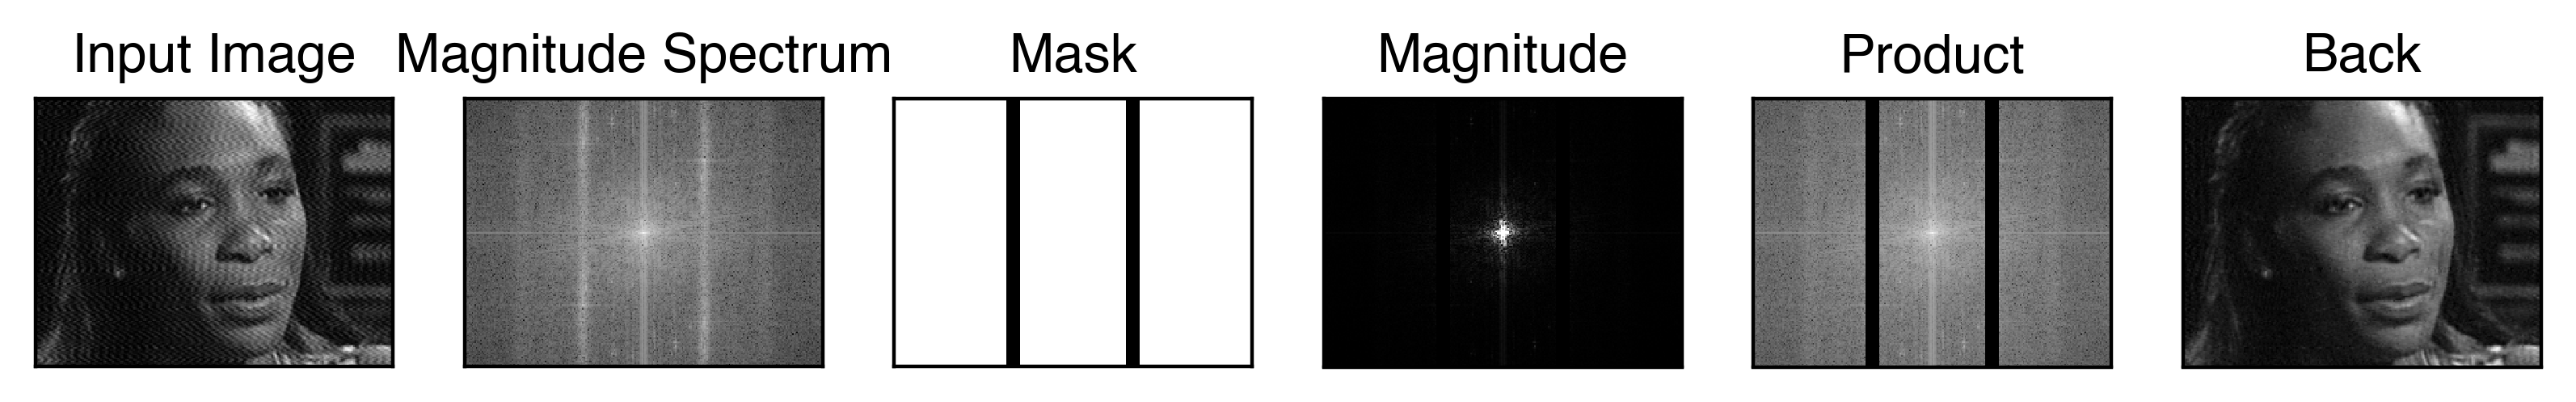

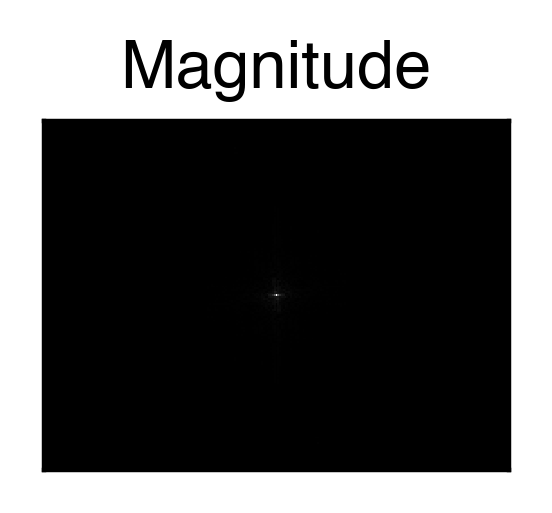

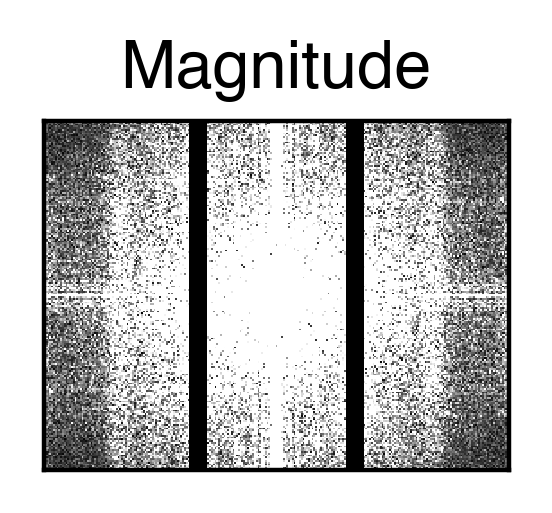

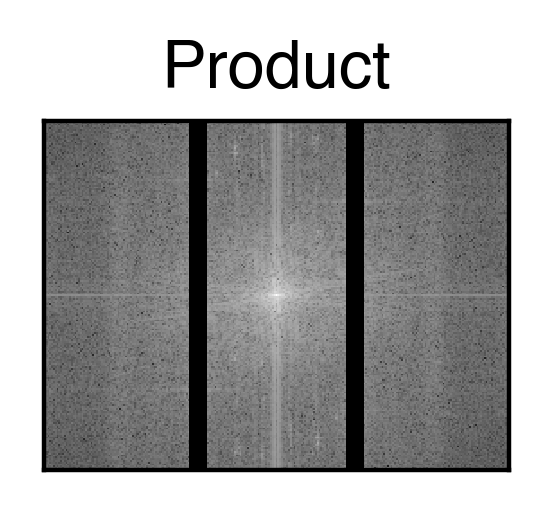

In [48]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy.misc as spm

img = cv2.imread('/Users/tel/git/public_tests/ruido_periodico.jpg', 0)

img_float32 = np.float32(img)       #mapea imagen de entrada a 32 bits/pixel

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)    #calcula la transf. Fourier 
dft_shift = np.fft.fftshift(dft)    #proyecta los cuadrantes de la imagen 

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))    #encuentra la magnitud, usa mapeo logaritmico y absoluto de la imagen real e imaginaria

ret, mag = cv2.threshold(magnitude_spectrum, 180, 190, cv2.THRESH_BINARY)
mask2 = np.zeros((img.shape[0],img.shape[1], 2), np.uint8)  # Crea la mascara con dos canales
mask2[:,:,0] = 1  # colocamos fondo blanco a la mascara
mask2[:,:,1] = 1  # colocamos fondo blanco a la mascara


mask = np.zeros((img.shape[0],img.shape[1], 3), np.uint8)  # Crea la mascara con dos canales
mask[:,:] = (255,255,255)  # colocamos fondo blanco a la mascara

ret, binary_mask = cv2.threshold(mask2, 180, 190, cv2.THRESH_BINARY)

for j in range(mag.shape[1]):
    # print(mag[mag.shape[0]//2][j])
    if mag[mag.shape[0]//2][j] == 190:
        right = j
        break


for j in range(mag.shape[1], 0 , -1):
    # print(mag[i][j])
    if mag[mag.shape[0]//2][mag.shape[1] - j] == 190:
        left = j
        break

print(right)
print(left)
mask2[0:img.shape[0], right:right+10] = 0
mask2[0:img.shape[0], left-10:left] = 0

mask[0:img.shape[0], right:right+10] = (0,0,0)
mask[0:img.shape[0], left-10:left] = (0,0,0)

# Aplicar la mascara y aplicar la transformada inversa
dft_shift = dft_shift*mask2
'''
dft_shift[0:img.shape[0], right:right+10,0] = 0
dft_shift[0:img.shape[0], left-10:left,0] = 0
dft_shift[0:img.shape[0], right:right+10,1] = 0
dft_shift[0:img.shape[0], left-10:left,1] = 0
'''
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

magnitude = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
product = 20*np.log(magnitude)
product[np.isneginf(product)] = 0

# product = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) 

# product = cv2.bitwise_not(product[:,:,0], product[:,:,1])

fig = plt.gcf()
fig.set_size_inches(10,4)

plt.subplot(1,6,1),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,6,2),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(1,6,3),plt.imshow(mask, cmap = 'gray')
plt.title('Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(1,6,4),plt.imshow(magnitude, cmap = 'gray', vmin=magnitude.min(), vmax=magnitude.max()/20)
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(1,6,5),plt.imshow(product, cmap = 'gray')
plt.title('Product'), plt.xticks([]), plt.yticks([])

plt.subplot(1,6,6),plt.imshow(img_back, cmap = 'gray')
plt.title('Back'), plt.xticks([]), plt.yticks([])
plt.show()   

fig = plt.gcf()
fig.set_size_inches(1.5,1.5)
plt.imshow(magnitude, cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()

fig = plt.gcf()
fig.set_size_inches(1.5,1.5)
plt.imshow(magnitude, cmap = 'gray', vmax=1000)
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()

fig = plt.gcf()
fig.set_size_inches(1.5,1.5)
plt.imshow(product, cmap='gray')#, vmin=magnitude.min(), vmax=magnitude.max())
plt.title('Product'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
plt.rcParams['figure.dpi'] = 200

In [39]:
# np.set_printoptions
with np.printoptions(suppress=True, precision=0, linewidth=9999, threshold=10**6):
    print(product.T)

[[104. 113. 112. 128. 108. 123. 107. 112. 107. 111. 116.  80.  81. 105.  99. 115. 113. 109. 127. 118.  92. 100. 115. 125. 114. 123. 124. 105.  92. 120. 137. 123. 102. 120. 109. 121.  83. 126. 115. 135. 122. 109. 127. 128. 109. 132. 127. 126. 128. 122. 117. 108. 113. 126. 101. 132. 114. 123. 134. 126. 131. 129. 115. 132. 125. 112. 115. 122. 124.  96. 124. 130. 127. 108. 119. 114. 120. 137.  95. 121. 117. 108. 141. 139. 123. 130. 127. 126. 124. 125. 137. 121. 121. 132. 135. 130. 129. 161. 104. 134. 132. 140. 133. 141. 125. 140. 124. 114. 129. 126. 133. 137. 114. 129. 138. 132. 127. 130. 121. 139. 143. 117. 114. 112. 122. 121. 134. 118. 125.  72. 130. 110. 116. 132.  99. 137. 132. 126. 107. 115. 117. 127. 119. 127. 139. 122. 132. 118. 127. 132. 102.  83. 117. 116. 111. 104. 116. 104. 118. 120. 119. 122. 119. 107. 105. 127. 111. 127. 117.  96. 125. 113. 110. 111. 128. 130. 111. 124. 109.  92. 106. 109. 117.  91. 101. 101. 114. 108. 113. 112.  83. 107. 111. 100.]
 [122. 108. 117. 121. 119. 

In [24]:
product

(194, 259)

In [42]:
print(np.log(0))

-inf


/Users/tel/git/lma/lma/jupyter/jupyterHelper.py:1: RuntimeWarning: divide by zero encountered in log
  """Some simple functions that are helpful in a Jupyter notebook environment


In [43]:
np.nan_to_num(product)[np.isinf(product)]

array([-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
       -3.4028235e+38, -3.4028235e+38, -3.4028235e+38], dtype=float32)

In [61]:
train = np.arange(np.prod((7231,80,60,4))).reshape(7231,80,60,4)
print(train.shape)

X = train.reshape(-1,80,60,1)
print(X.shape)

(7231, 80, 60, 4)
(28924, 80, 60, 1)


In [63]:
np.dtype('O')

dtype('O')

In [59]:
X = train.reshape(-1,80,60,1)

array([[[[        0],
         [        1],
         [        2],
         ...,
         [       57],
         [       58],
         [       59]],

        [[       60],
         [       61],
         [       62],
         ...,
         [      117],
         [      118],
         [      119]],

        [[      120],
         [      121],
         [      122],
         ...,
         [      177],
         [      178],
         [      179]],

        ...,

        [[     4620],
         [     4621],
         [     4622],
         ...,
         [     4677],
         [     4678],
         [     4679]],

        [[     4680],
         [     4681],
         [     4682],
         ...,
         [     4737],
         [     4738],
         [     4739]],

        [[     4740],
         [     4741],
         [     4742],
         ...,
         [     4797],
         [     4798],
         [     4799]]],


       [[[     4800],
         [     4801],
         [     4802],
         ...,
         [     4

In [60]:
7231*2

14462

In [71]:
import numpy as np


In [95]:
import math
import matplotlib.pyplot as plt
import numpy as np

def generate_voronoi_diagram(width, height, centers_x, centers_y):
    arr = np.zeros((width, height, 3))
    imgx,imgy = width, height
    num_cells=len(centers_x)
    
    nx = centers_x
    ny = centers_y
    nr = list(range(num_cells))
    ng = nr
    nb = nr
    
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            arr[x, y] = (nr[j], ng[j], nb[j])
    
    plt.imshow(arr.astype(int))
    plt.show()
    return arr

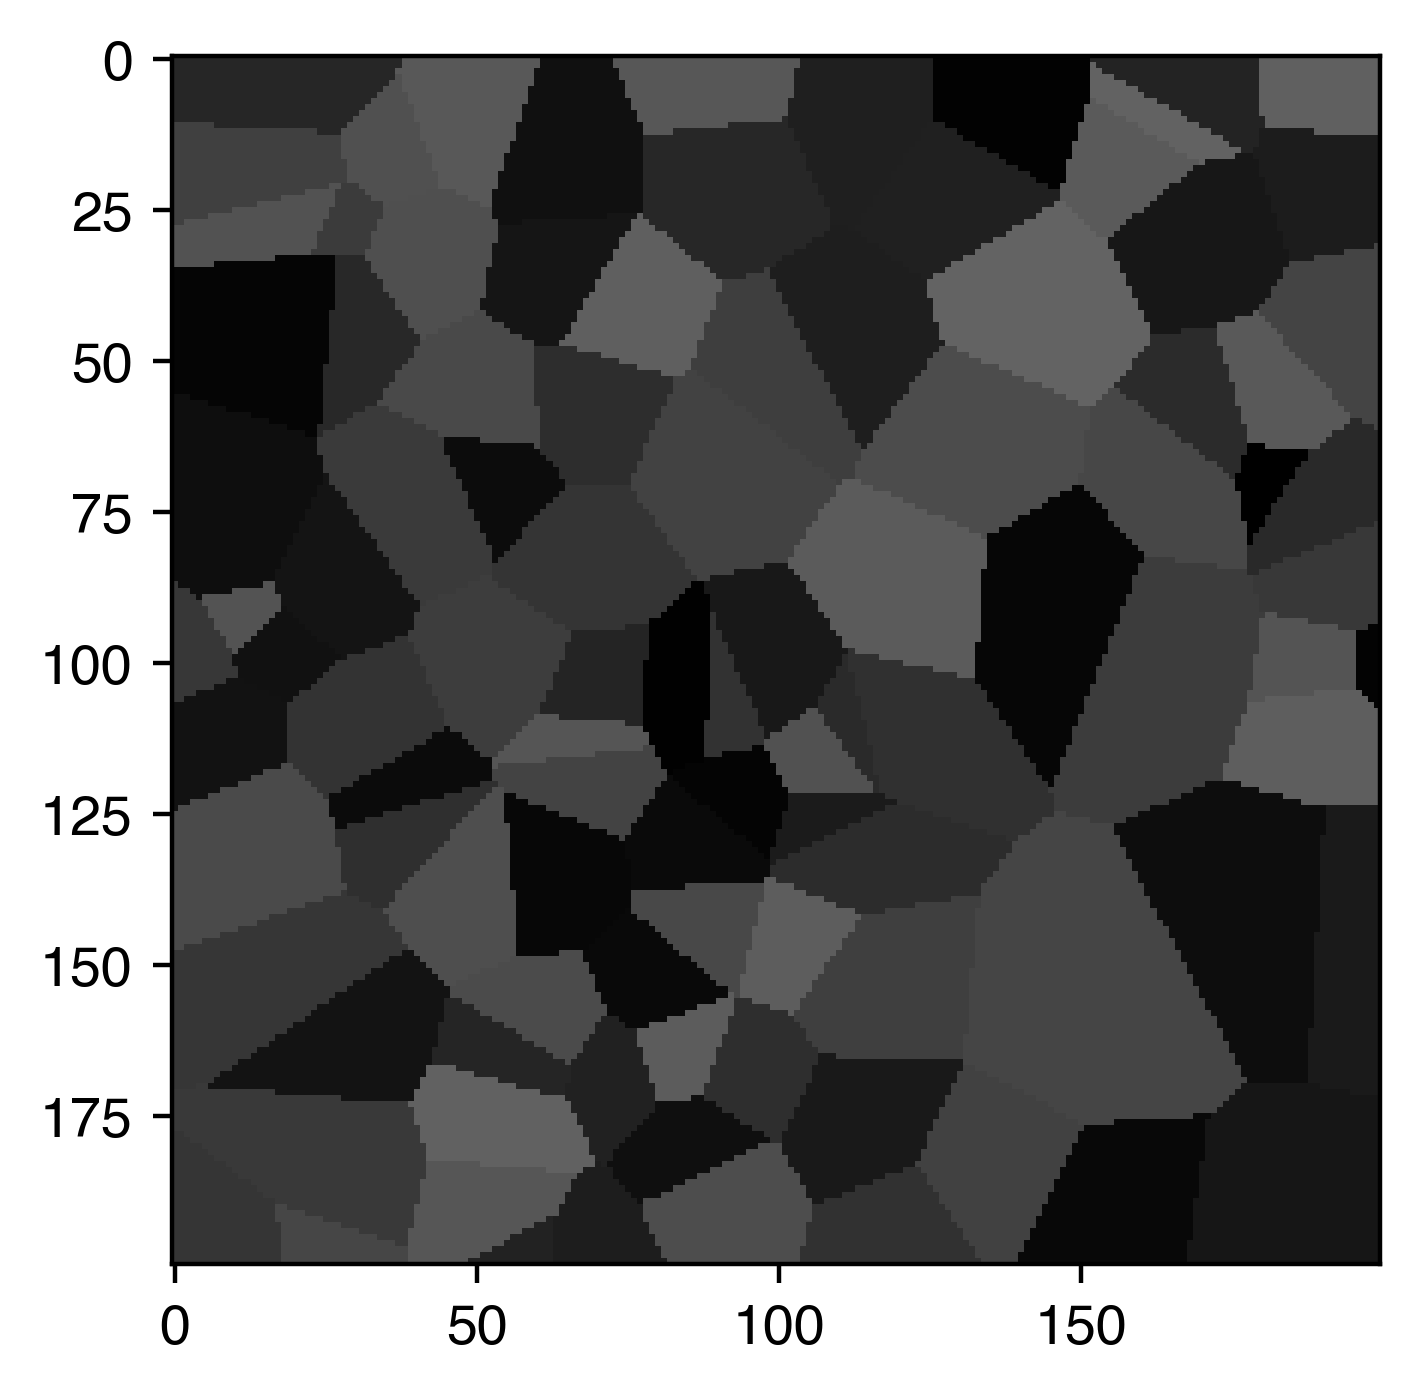

In [96]:
def randcenters(width, height, num):
    centers_x = np.random.rand(num) * width
    centers_y = np.random.rand(num) * height
    
    return centers_x,centers_y

wh = (200,200)
num = 100
cens = randcenters(*wh, num)

arr = generate_voronoi_diagram(*wh, *cens)

In [2]:
import numpy as np

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def vorarr(regions, vertices, width, height, dpi=100):
    fig = plt.Figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    canvas = FigureCanvas(fig)
    ax = fig.add_axes([0,0,1,1])

    # colorize
    for region in regions:
        polygon = vertices[region]
        ax.fill(*zip(*polygon), alpha=0.4)

    ax.plot(points[:,0], points[:,1], 'ko')
    ax.set_xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    ax.set_ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

    canvas.draw()
    return np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(height, width, 3)

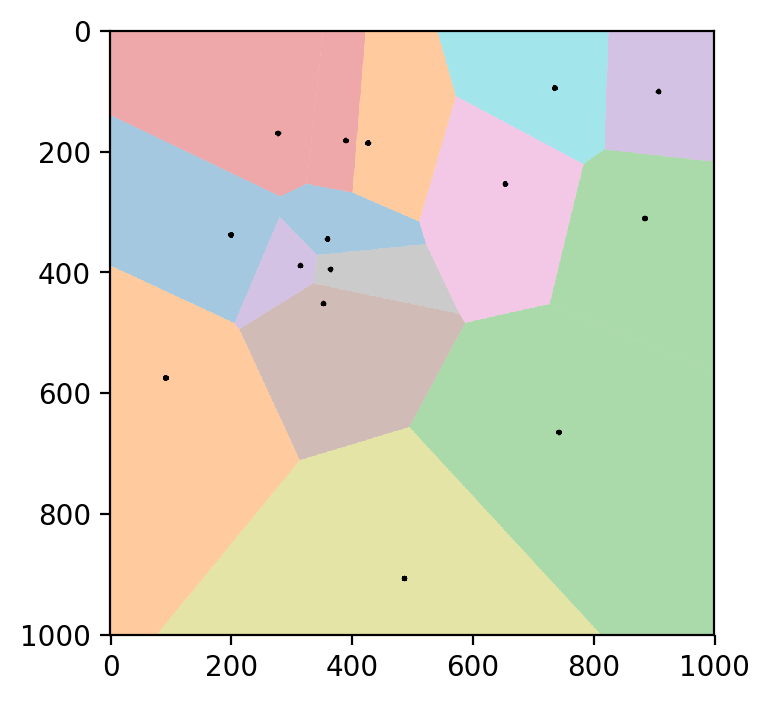

In [8]:
from scipy.spatial import Voronoi

# get random points
np.random.seed(1234)
points = np.random.rand(15, 2)

# compute Voronoi tesselation
vor = Voronoi(points)

# voronoi_finite_polygons_2d function from https://stackoverflow.com/a/20678647/425458
regions, vertices = voronoi_finite_polygons_2d(vor)

# convert plotting data to numpy array
arr = vorarr(regions, vertices, width=1000, height=1000)

# plot the numpy array
plt.imshow(arr)

/Users/tel/git/lma/lma/jupyter/jupyterHelper.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [90]:
arr.min()

0.0

In [70]:
cens

(array([4.52088234, 3.77923789, 2.46810918, 0.531402  , 3.08032564,
        3.31994567]),
 array([3.35751324, 4.29159243, 0.91383846, 1.59480119, 2.89310076,
        3.54176283]))

In [34]:
V = np.array([ 60.208589,   60.8721745,  61.4382305,  61.515143,   62.2128025,  62.888581,
  63.567809,   64.250832,   64.937775,   65.6287725,  66.3238705])
T = np.linspace(10.00, 2000.00, 4)
P = np.linspace(1., 10., 4)
print(((2.293710449E+17)*(1E-21) * P * V[:,None]).reshape(-1))

[0.01381011 0.05524043 0.09667075 0.13810107 0.01396231 0.05584926
 0.0977362  0.13962314 0.01409215 0.0563686  0.09864506 0.14092151
 0.01410979 0.05643917 0.09876855 0.14109793 0.01426982 0.05707926
 0.09988871 0.14269816 0.01442482 0.05769928 0.10097374 0.1442482
 0.01458061 0.05832246 0.1020643  0.14580615 0.01473728 0.05894912
 0.10316096 0.1473728  0.01489485 0.05957938 0.10426392 0.14894845
 0.01505334 0.06021336 0.10537338 0.1505334  0.01521278 0.0608511
 0.10648943 0.15212775]


In [57]:
plt.rcParams['figure.dpi'] = 150

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


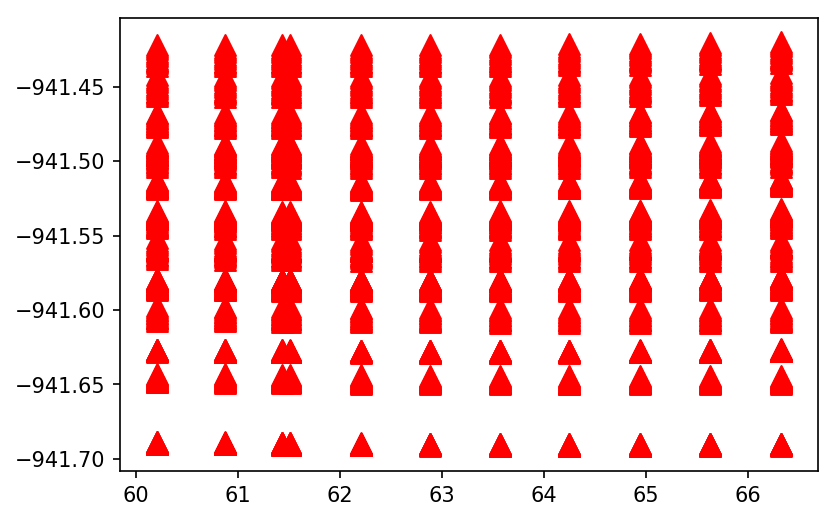

In [59]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

F_VT = np.array([[-941.57370763, -941.57401198, -941.57415914, -941.5741743 , -941.57418547, -941.57409029, -941.57384471, -941.57349143, -941.57299666, -941.57242367, -941.57172351], 
                 [-941.59428621, -941.59452901, -941.59467455, -941.59470002, -941.59475968, -941.59472847, -941.59457033, -941.59432064, -941.5939331 , -941.59347988, -941.59293092], 
                 [-941.64179308, -941.64203825, -941.64223508, -941.642278  , -941.64245276, -941.64254897, -941.6425414 , -941.64245835, -941.64223967, -941.64196782, -941.641634  ], 
                 [-941.70391106, -941.70416543, -941.70441939, -941.70448022, -941.70477693, -941.70500704, -941.70515626, -941.70524589, -941.70520195, -941.70511723, -941.70500381]])

V = np.array([ 60.208589,   60.8721745,  61.4382305,  61.515143,   62.2128025,  62.888581, 63.567809,   64.250832,   64.937775,   65.6287725,  66.3238705])

T = np.linspace(10.00, 2000.00, 4)
P = np.linspace(1., 10., 4)

fig = plt.figure()
ax = fig.gca()

for index_T, Ts in enumerate(T):
    for Ps in P:
        aux_P = []
        for Vs in V:
            Fb_VT = F_VT[index_T][:] + (2.293710449E+17)*(1E-21) * Ps * Vs
            p1 = ax.scatter(V, Fb_VT, color='red', marker="^", label='Calcite I', s=100)
            
fig.show()

In [37]:
PV = ((2.293710449E+17)*(1E-21) * P * V[:,None])
PV[None, :, None].shape

(1, 11, 1, 4)

In [51]:
PV = ((2.293710449E+17)*(1E-21) * P * V[:,None]).reshape(-1)
Fb_VT = np.swapaxes(F_VT[..., None] + PV[None, None, ...], 0, 1)
Fb_VT_alt = (F_VT[..., None, :] + PV[None, ..., None]).reshape(-1, F_VT.shape[1])
Fb_VT_alt2 = F_VT[None, ...] + PV[..., None, None]

In [33]:
PV

array([0.01381011, 0.05524043, 0.09667075, 0.13810107, 0.01396231,
       0.05584926, 0.0977362 , 0.13962314, 0.01409215, 0.0563686 ,
       0.09864506, 0.14092151, 0.01410979, 0.05643917, 0.09876855,
       0.14109793, 0.01426982, 0.05707926, 0.09988871, 0.14269816,
       0.01442482, 0.05769928, 0.10097374, 0.1442482 , 0.01458061,
       0.05832246, 0.1020643 , 0.14580615, 0.01473728, 0.05894912,
       0.10316096, 0.1473728 , 0.01489485, 0.05957938, 0.10426392,
       0.14894845, 0.01505334, 0.06021336, 0.10537338, 0.1505334 ,
       0.01521278, 0.0608511 , 0.10648943, 0.15212775])

In [50]:
Fb_VT.shape

(11, 4, 44)

In [27]:
F_VT[..., None].shape

(4, 11, 1)

In [32]:
Fb_VT_alt.shape

(4, 44, 11)

In [60]:
import pandas as pd
pd.DataFrame

In [67]:
import pandas as pd

df = pd.DataFrame()
df['Amortization_per_Day'] = (2.5, 3.2, 5.5, 6.5, 9.2)
df['Start_Date'] = ('1/1/18', '2/27/18', '3/31/18', '5/23/2018', '6/30/2018') 
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
dr = pd.date_range('10/31/2017', periods=75, freq='Q-Jan')

In [103]:
from datetime import datetime

sdv = df['Start_Date'].values.astype('datetime64[D]')
sdvpad = np.zeros(sdv.size + 2, dtype=sdv.dtype)
sdvpad[1:-1] = sdv
sdvpad[0],sdvpad[-1] = np.datetime64(datetime.min), np.datetime64(datetime.max)

drv = dr.values.astype('datetime64[D]')

In [ ]:
from datetime import datetime
import pandas as pd

df = pd.DataFrame()
df['Amortization_per_Day'] = (2.5, 3.2, 5.5, 6.5, 9.2)
df['Start_Date'] = ('1/1/18', '2/27/18', '3/31/18', '5/23/2018', '6/30/2018') 
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
dr = pd.date_range('10/31/2017', periods=75, freq='Q-Jan')

def betweendates(x, y):
    xv = x.values.astype('datetime64[D]')
    xpad = np.zeros(xv.size + 2, dtype=xv.dtype)
    xpad[1:-1] = xv
    xpad[0],xpad[-1] = np.datetime64(datetime.min), np.datetime64(datetime.max)

    yv = y.values.astype('datetime64[D]')
    
    return (xpad[:-1] <= yv[:,None]) & (xpad[1:] >= yv[:,None])

# get a boolean array that indicates which dates in dr are in between which dates in df['Start_Date']
btwn = betweendates(df['Start_Date'], dr)

# based on the boolean array btwn, select out the salient rows from df and dates from dr
dfsel = df[btwn[:, 1:].T]
drsel = dr[btwn[:, 1:].sum(axis=1, dtype=bool)]

# do the actual calculation the OP wanted
dfsel['Amortization_per_Day'] * ((drsel - dfsel['Start_Date']).dt.days + 1)

In [7]:
with pd.option_context("display.max_rows",20):
    print(dfsel['Amortization_per_Day'] * ((drsel - dfsel['Start_Date']).dt.days + 1))

0       77.5
2      170.5
4      294.4
4     1140.8
4     1987.2
4     2806.0
4     3652.4
4     4498.8
4     5345.2
4     6173.2
      ...   
4    52394.0
4    53212.8
4    54059.2
4    54905.6
4    55752.0
4    56570.8
4    57417.2
4    58263.6
4    59110.0
4    59938.0
Length: 74, dtype: float64


In [38]:
import scipy.integrate as spi

count = 0

def pend(t, y):
    global count
    
    theta, omega = y
    dydt = [omega, -.25*omega - 5*np.sin(theta)]
    
    count += 1
    return dydt

sol = spi.solve_ivp(pend, [0, 10], [np.pi - 0.1, 0.0])
print(count)

182


In [ ]:
pend()

In [27]:
dir(pend)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [23]:
def foo(a=2, b=9):
    pass

In [43]:
pd.__file__

'/usr/local/lib/python3.6/site-packages/pandas/__init__.py'

In [48]:
import pandas as pd

def getlocals(obj, lcls=None):
    if lcls is None: lcls = dict(locals().items())
        
    objlcls = {k:v for k,v in obj.__dict__.items() if not k.startswith('_')}
    lcls.update(objlcls)
    
    return lcls

x = "[123,DatetimeIndex(['2018-12-04','2018-12-05', '2018-12-06'],dtype='datetime64[ns]', freq='D')]"
lcls = getlocals(pd)

result = eval(x, globals(), lcls)
print(result)

[123, DatetimeIndex(['2018-12-04', '2018-12-05', '2018-12-06'], dtype='datetime64[ns]', freq='D')]


In [69]:
import matplotlib.pyplot as plt 

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot([0, 1, 2], [0, 1, 2], color=color1,label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], color=color2, label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], color=color3, label="Velocity")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def align_xaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, x1 = ax1.transData.transform((v1, 0))
    _, x2 = ax2.transData.transform((v2, 0))
    inv = ax2.transData.inverted()
    _, dx = inv.transform((0, 0)) - inv.transform((x1-x2, 0))
    minx, maxx = ax2.get_xlim()
    ax2.set_xlim(minx+dx, maxx+dx)

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


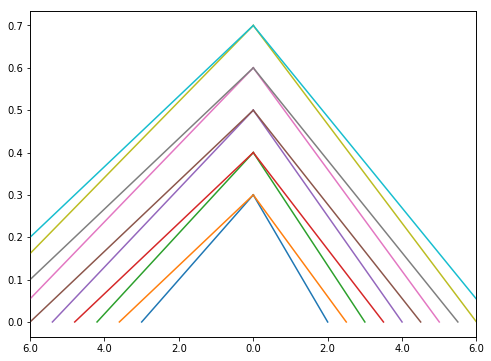

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from numbers import Number

tickkwargs = {m+k:False for k in ('bottom','top','left','right') for m in ('','label')}

p = np.zeros((10, 3, 2))
p[:,0,0] -= np.arange(10)*.1 + .5
p[:,1,1] += np.repeat(np.arange(5), 2)*.1 + .3
p[:,2,0] += np.arange(10)*.5 + 2

fig = plt.figure(figsize=(8,6))
host = fig.add_subplot(111)
par = host.twiny()

host.set_xlim(-6, 6)
par.set_xlim(-1, 1)

for ps in p:
    # mask the points with negative x values
    ppos = ps[ps[:,0] >= 0].T
    host.plot(*ppos)
    
    # mask the points with positive x values
    pneg = ps[ps[:,0] <= 0].T
    par.plot(*pneg)
    
# hide all possible ticks/notation text that could be set by the second x axis
par.tick_params(axis="both", **tickkwargs)
par.xaxis.get_offset_text().set_visible(False)

# fix the x tick labels so they're all positive
host.set_xticklabels(np.abs(host.get_xticks()))

fig.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


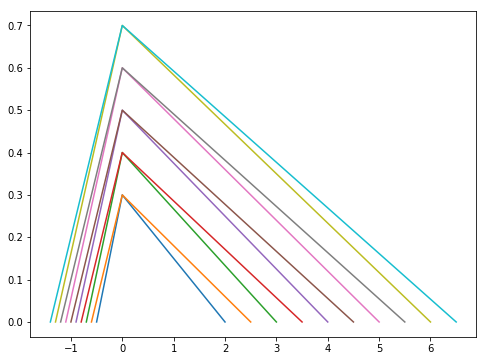

In [39]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
for ps in p:
    ax.plot(*ps.T)
fig.show()

TypeError: Incompatible X, Y inputs to pcolormesh; see help(pcolormesh)

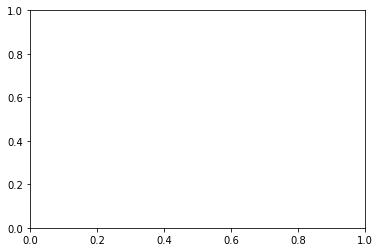

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# assume that the OP is starting from 1D X,Y,Z arrays
shape = (10, 7)
X,Y = np.meshgrid(np.arange(shape[0]), np.arange(20, 20 + shape[1]))
X,Y = X.ravel(), Y.ravel()
Z = np.random.rand(np.prod(shape))

def plotBinary(X, Y, Z, shape):
    # reshape the arrays into 2D
    X = X.reshape(*shape)
    Y = Y.reshape(*shape).T
    Z = Z.reshape(*shape)
    
    plt.pcolormesh(X, Y, Z, cmap='gray')

plotBinary(X, Y, Z, shape)
plt.show()

In [11]:
x_np = np.random.rand(10, 10)
typecodes = np.ctypeslib._get_typecodes()
typecodes[x_np.__array_interface__['typestr']]

ctypes.c_double

In [9]:
x_np.__array_interface__['typestr']

'<f8'

In [2]:
import ctypes
import numpy as np

def get_typecodes():
    ct = ctypes
    simple_types = [
        ct.c_byte, ct.c_short, ct.c_int, ct.c_long, ct.c_longlong,
        ct.c_ubyte, ct.c_ushort, ct.c_uint, ct.c_ulong, ct.c_ulonglong,
        ct.c_float, ct.c_double,
    ]

    return {np.dtype(ctype).str: ctype for ctype in simple_types}

x_np = np.random.rand(10, 10)
typecodes = get_typecodes()
typecodes[x_np.__array_interface__['typestr']]

ctypes.c_double

In [4]:
arr = np.array([[1, 3, 4],
          [3, 2, 5],
          [4, 5, 1]])

In [5]:
rarr = arr / arr.sum(axis=0, keepdims=True)

In [7]:
carr = rarr / arr.sum(axis=1, keepdims=True)

In [9]:
import datetime as dt
import pandas as pd
series = pd.Series(list('abc'))
date = dt.datetime(2016, 10, 30, 0, 0)
series["Date_column"] =date

In [10]:
series

0                                a
1                                b
2                                c
Date_column    1477785600000000000
dtype: object

In [16]:
import scipy.integrate as spi

class Acc:
    def __init__(self):
        self.x = 0
    
    def __str__(self):
        return str(self.x)
    
def pend_partial(acc):
    def pend(t, y):
        theta, omega = y
        dydt = [omega, -.25*omega - 5*np.sin(theta)]
        
        acc.x += 1
        return dydt
    return pend

count = Acc()
sol = spi.solve_ivp(pend_partial(count), [0, 10], [np.pi - 0.1, 0.0])
print(count)

182
